# imports

## functions

In [1]:
from MSM_utility import *
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# old school

## data

In [2]:
Data = pd.read_excel('data4paper01.xlsx', 'Sheet1')


In [110]:
# read data
Data = pd.read_excel('data4paper01.xlsx', 'Sheet1')
asset = ('GOLDS', 'GVZ', 'SPX', 'VIX', 'EURUSD', 'EUVIX')

for i in range(0,len(asset)):
    exec(eval("asset["+str(i)+"]") + "= Data.loc[:,('Dates'," + "asset[" + str(i) + "])]")
    exec(eval("asset["+str(i)+"]") + "_r = 100 * np.log(1 + " + str(eval("asset["+str(i)+"]")
                                                                    + ".iloc[:,1]") + ".pct_change().dropna())")
    exec(eval("asset["+str(i)+"]") + " = " + eval("asset["+str(i)+"]") + ".dropna()")

print("GOLDS len : " + str(len(GOLDS)) + '\n' +
      "GVZ   len : " + str(len(GVZ)) + '\n' +
      "SPX   len : " + str(len(SPX)) + '\n' +
      "VIX   len : " + str(len(VIX)) + '\n' +
      "EURUSD   len : " + str(len(EURUSD)) + '\n' +
      "EUVIX   len : " + str(len(EUVIX)) + '\n')


GOLDS len : 7824
GVZ   len : 2551
SPX   len : 7824
VIX   len : 7356
EURUSD   len : 7824
EUVIX   len : 2665



In [120]:
Data.describe()

GOLDS          GVZ          SPX          VIX          CL1  \
count  7824.000000  2551.000000  7824.000000  7356.000000  7824.000000   
mean    685.730164    20.253822  1115.403174    19.333297    45.259041   
std     450.164117     7.740494   578.858465     7.851883    29.866580   
min     252.550000     9.430000   250.830000     9.140000    10.720000   
25%     352.237500    15.490000   578.157500    13.630000    20.127500   
50%     403.825000    18.430000  1131.965000    17.470000    31.775000   
75%    1142.700000    22.605000  1402.340000    22.762500    65.715000   
max    1900.230000    64.530000  2872.870000    80.860000   145.290000   

               OVX       EURUSD        EUVIX       USDJPY        JYVIX  \
count  2829.000000  7824.000000  2665.000000  7824.000000  2665.000000   
mean     36.571241     1.213631    11.028856   112.067042    11.746807   
std      13.772668     0.148701     3.788101    16.388936     3.535014   
min      14.500000     0.827200     4.430000    75.820000     5.030000   
25%      27.950000     1.117600     8.430000   102.510000     9.270000   
50%      33.560000     1.229900    10.450000   111.945000    11.400000   
75%      43.000000     1.318800    12.760000   122.120000    13.330000   
max     100.420000     1.599100    29.670000   159.900000    36.330000   

            GBPUSD        BPVIX  
count  7824.000000  2665.000000  
mean      1.629226    10.466188  
std       0.170025     4.310953  
min       1.204700     4.330000  
25%       1.527975     7.700000  
50%       1.606900     9.350000  
75%       1.717050    11.730000  
max       2.107500    30.860000

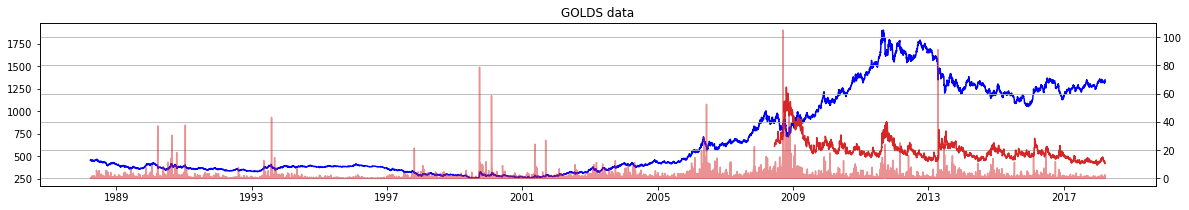

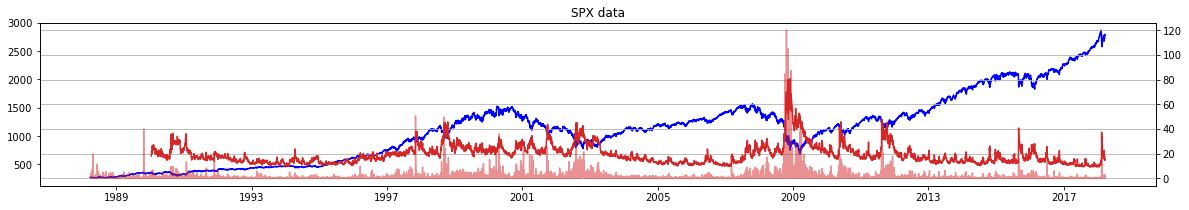

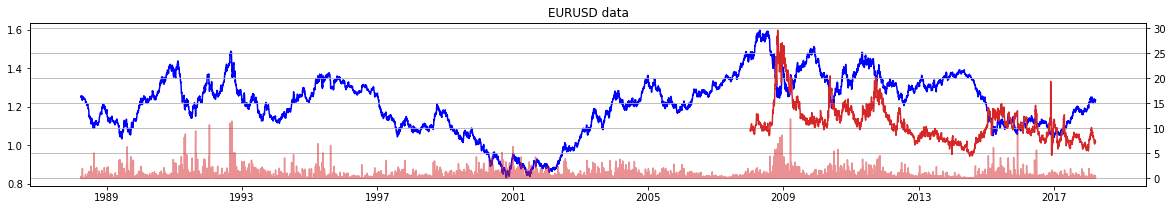

In [119]:
for i in (0,2,4):
    plt.figure(figsize=(20,3))
    ax1 = plt
 #     fig,ax1 = plt.subplots()
    exec("_=ax1.plot("+eval('''asset['''+str(i)+''']''')+".loc[:,'Dates'],"+eval('''asset['''+str(i)+''']''') +
         ".iloc[:,1],'b-')")
    ax2 = ax1.twinx()
    exec("_=ax2.plot("+eval('''asset['''+str(i)+''']''')+".iloc[1:,0],"+eval('''asset['''+str(i)+''']''') +
         "_r**2,color = 'tab:red', alpha = 0.5)")
    exec("_=ax2.plot("+eval('''asset['''+str(i+1)+''']''')+".iloc[1:,0],"+eval('''asset['''+str(i+1)+''']''')+
         ".iloc[1:,1],color = 'tab:red', alpha = 1)")
    plt.grid(b=True)
    plt.title(eval('''asset['''+str(i)+''']''')+' data')
plt.show()

In [8]:
for i in range(4,5):#(0,2,4)

    name = eval('''asset[''' + str(i) + ''']''')
    exec("data =" + eval('''asset[''' + str(i) + ''']''') + "_r")
    distribution = "Normal"
    dof = 1  # for Chi**2 only
    send_out = "vol"

    output = df()
    output["m0"] = []
    output["b"] = []
    output["gamma_k"] = []
    output["sigma"] = []
    output["LL"] = []
    result = []

    startingvals = []  # [1.2, 1.2, 0.5 , 1.2 ]
    LB = [1, 1, 0.001, 0.0001]
    UB = [1.99, 100, 0.99999, 50]

    op_methods = 'slsqp'
    data2 = data

    for i in range(0, 10):

        kbar = i + 1
        A = t_mat_temp(kbar)

        if kbar > 1 and bool(result):
            startingvals = [result.params['m0'].value, result.params['b'].value,
                            result.params['gamma_k'].value, result.params['sigma'].value]
        result = MSM_fitdata(data, kbar, LB, UB, op_methods, startingvals, A, distribution, dof, send_out)

        re2 = MSM_likelihood_new(result.params['m0'].value, result.params['b'].value,
                                 result.params['gamma_k'].value, result.params['sigma'].value, kbar, data2,
                                 A, distribution, dof, send_out)
        output.loc[i, "LL"] = re2
        for element in result.params:
            output.loc[i, element] = result.params[element].value
            
    name_1 = 'Output'.join((date.today().strftime('%y%m%d'), op_methods + name + 'varyk.xlsx')) 
    writer = pd.ExcelWriter(name_1)
    output.to_excel(writer, 'Sheet1')
    writer.save()



==========init params=========
m0 =   1.4533
b =   1.5000
gamma_k =   0.0100
sigma =   0.6215


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4780
b =   1.5000
gamma_k =   0.0204
sigma =   0.6464


LLs = 7011.3652
AIC =  25.7106
BIC =  17.7106
==========init params=========
m0 =   1.4212
b =   1.5000
gamma_k =   0.0152
sigma =   0.6464


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4254
b =   4.9225
gamma_k =   0.0253
sigma =   0.6054


LLs = 6922.3759
AIC =  25.6850
BIC =  17.6850
==========init params=========
m0 =   1.3460
b =   1.5000
gamma_k =   0.0177
sigma =   0.6054


 ==========fitted results==========
optimization method = slsqp
m0 =   1.3754
b =   2.5933
gamma_k =   0.0180
sigma =   0.6963


LLs = 6897.3557
AIC =  25.6778
BIC =  17.6778
==========init params=========
m0 =   1.3370
b =   1.5000
gamma_k =   0.0140
sigma =   0.6963


 ==========fitted results==========
optimization method = slsqp
m0 =   1.3205
b =   2.2776


## train

In [ ]:
len(GVZ)

In [9]:
maxlen = 2551

In [10]:
distribution = "Normal"
dof = 1 # for Chi**2 only
send_out = "vol"
    
for j in  range(4,5):#(0,2,4)
    
    # this step use partial data
    

    name = eval('''asset['''+str(j)+''']''')
    exec( "data =" + eval('''asset['''+str(j)+''']''')+"_r" )
    exec( "data_y =" + eval('''asset['''+str(j+1)+''']''') )
    
    if len(data_y) >= maxlen :
        data_y = data_y.iloc[-maxlen:,1]
    else :
        data_y = data_y.iloc[:,1]

    data = data.iloc[:len(data)-len(data_y)]
            
    output = df()
    output["m0"] = []
    output["b"] = []
    output["gamma_k"]=[]
    output["sigma"] = []
    output["LL"] = []
    result = []

    startingvals = []#[1.2, 1.2, 0.5 , 1.2 ]
    LB = [1, 1, 0.001, 0.0001]
    UB = [1.99, 50, 0.99999, 50]
    
    op_methods = 'slsqp'
    data2 = data

    for i in range(0,10):
        kbar = i+1
        A = t_mat_temp(kbar)
        if kbar >1 and bool(result):
            startingvals = [result.params['m0'].value,result.params['b'].value,
                            result.params['gamma_k'].value,result.params['sigma'].value]
        result = MSM_fitdata(data, kbar, LB, UB, op_methods, startingvals, A, distribution, dof, send_out)
         
        re2 = MSM_likelihood_new(result.params['m0'].value, result.params['b'].value,
                                 result.params['gamma_k'].value, result.params['sigma'].value, kbar, data2,
                                 A, distribution, dof, send_out)
        output.loc[i,"LL"] = re2
        for element in result.params:
            output.loc[i,element] = result.params[element].value
        
    # save for report with xls
    writer = pd.ExcelWriter('Output'.join((date.today().strftime('%y%m%d'),'_'+name+op_methods+'partial_4forecast_varyk.xlsx')))
    output.to_excel(writer, 'Sheet1')
    writer.save()
    
    # save for use with .pkl
    model_name = ''.join((date.today().strftime('%y%m%d'),"_"+str(name) + str(kbar)+ op_methods+str(maxlen)+  'partial_forecast.pkl'))
    # Saving the objects:
    with open(model_name, 'wb') as f: 
        pickle.dump(result.params, f)
        print(model_name)
    

==========init params=========
m0 =   1.4268
b =   1.5000
gamma_k =   0.0100
sigma =   0.6137


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4755
b =   1.5000
gamma_k =   0.0339
sigma =   0.6063


LLs = 4709.6048
AIC =  24.9147
BIC =  16.9147
==========init params=========
m0 =   1.3816
b =   1.5000
gamma_k =   0.0220
sigma =   0.6063


 ==========fitted results==========
optimization method = slsqp
m0 =   1.3830
b =   1.4345
gamma_k =   0.0191
sigma =   0.6118


LLs = 4663.9631
AIC =  24.8952
BIC =  16.8952
==========init params=========
m0 =   1.3138
b =   1.4345
gamma_k =   0.0146
sigma =   0.6118


 ==========fitted results==========
optimization method = slsqp
m0 =   1.3450
b =   6.3883
gamma_k =   0.0675
sigma =   0.5855


LLs = 4649.9454
AIC =  24.8892
BIC =  16.8892
==========init params=========
m0 =   1.3323
b =   6.3883
gamma_k =   0.5288
sigma =   0.5855


 ==========fitted results==========
optimization method = slsqp
m0 =   1.3661
b =  23.7785


## out-of-sample test

### import params

In [11]:
op_methods = 'slsqp'
kbar = 10
LB = [1, 1, 0.001, 0.0001]
UB = [1.99, 50, 0.99999, 50]
send_out = 'forecast multistep'
predict_period = 22
startingvals = []

In [12]:
param_name = ('180429_GOLDS10slsqp2551partial_forecast.pkl',
              '180429_SPX10slsqp2551partial_forecast.pkl',
              '180501_EURUSD10slsqp2551partial_forecast.pkl')

### forecast

In [13]:
position = (0,2,4)
position_y = (1,3,5)

distribution = "Normal"
dof = 1 # for Chi**2 only
# distribution = distribution
# dof = dof

for j in range(0,3):
    
    # get many data
    name = eval('''asset['''+str(position[j])+''']''')
    exec( "data =" + eval('''asset['''+str(position[j])+''']''')+"_r" ) # if VIX selete _r
    exec( "data_y =" + eval('''asset['''+str(position_y[j])+''']''') )
    ele = param_name[j]
    
    if len(data_y) > maxlen :
        data_y = data_y.iloc[-maxlen:,1]
    else :
        data_y = data_y.iloc[:,1]
        
    data_test = data.iloc[len(data_y):len(data)]
    starting_index = len(data_test)
    
    # load
    with open(ele, 'rb') as f: 
#         print(f)
        rez = pickle.load(f)
#         print(rez)
    
    # find latent state variable -> use all data
    A = t_mat_temp(kbar)
    pi_mat, A, sigma, s = MSM_likelihood_new(rez, kbar, data, predict_period, 
                                             A_in = A, distribution = distribution, dof = dof, send_out = send_out)
    
    
    # forecast use test data
    
    # df_reg matrix
    df_reg = []
    df_reg = data_y.to_frame()
    df_reg[name] = data
    df_reg['Dates']=Data['Dates']
    df_reg['MSM'] = 0.
    df_reg = df_reg.reset_index(drop=True)
    
    t1 = time()
    
    # s  is matrix of sigma
    # s1 is vector of sigma
    # decide to fit s as a square or not here >>>>>>>>>>>>>
    s1 = s[0,:]**2
    pi_mat_cut = pi_mat[starting_index+1:,:]
    vol=0
    for t in range(0,predict_period):
        t = predict_period
        AA = np.linalg.matrix_power(A, t+1)
        new_pi_A = np.matmul(pi_mat_cut,AA)
        vol = vol + np.transpose(np.inner(new_pi_A,s1))
    df_reg.loc[:,"MSM"]=np.sqrt(252/predict_period*vol)
    
# df_reg.loc[len(pi_mat)-i-2,"MSM"] = sum(vol)
    print("TIME : %2.5f" %(time() - t1)) 
    
    #save
    name_L = 'MSM_vol22'.join((date.today().strftime('%y%m%d'),'_'+name+str(maxlen)+"_"+distribution+'('+str(dof)+')_predict=['+str(predict_period)+'].xlsx'))
    writer = pd.ExcelWriter(name_L)
    print(name_L)
    df_reg.to_excel(writer, 'Sheet1')
    writer.save()

len arg =4
TIME : 8.98089
180501MSM_vol22_GOLDS2551_Normal(1)_predict=[22].xlsx
len arg =4
TIME : 7.99125
180501MSM_vol22_SPX2551_Normal(1)_predict=[22].xlsx
len arg =4
TIME : 7.70449
180501MSM_vol22_EURUSD2551_Normal(1)_predict=[22].xlsx


### test by regression

In [14]:
filename = ("180501MSM_vol22_GOLDS2551_Normal(1)_predict=[22].xlsx",
            "180501MSM_vol22_SPX2551_Normal(1)_predict=[22].xlsx",
            "180501MSM_vol22_EURUSD2551_Normal(1)_predict=[22].xlsx")

In [15]:
position = (0,2,4)
position_y = (1,3,5)

for i in range(0,3):
    
    # import old data
    ele = param_name[i]
    with open(ele, 'rb') as f: 
        rez = pickle.load(f)
    
    # load
    xls = pd.ExcelFile(filename[i])
    df_reg = pd.read_excel(xls)
    
    # reg
    for ele in rez:
        print(ele,' = %8.4f'  %rez[ele].value)
    
    print('Parameters : ', param_name[i])
    print('Datas : ',filename[i])
    
    x = df_reg.loc[:,'MSM'].values.reshape(len(df_reg),1)
    y = df_reg[eval('''asset['''+str(position[i]+1)+''']''')]
    
    # y = mx+c
    x2 = sm.add_constant(x)
    est = sm.OLS(y, x2)
    est2 = est.fit()
    print(est2.summary())
    print("MODEL MSE",est2.mse_resid)
    print("MODEL TSE",est2.mse_total)
    
    
    #y=mx
    est = sm.OLS(y, x)
    est2 = est.fit()
    print(est2.summary())
    print("MODEL MSE",est2.mse_resid)
    print("MODEL TSE",est2.mse_total)

    
#     #y=mx+c for realized data
#     y = df_reg[eval('''asset['''+str(position[i])+''']''')]**2
#     x2 = sm.add_constant(x)
#     est = sm.OLS(y, x2)
#     est2 = est.fit()
#     print(est2.summary())
#     print("MODEL MSE",est2.mse_resid)
#     print("MODEL TSE",est2.mse_total)
    
#     #y=mx for realized data
#     y = df_reg[eval('''asset['''+str(position[i])+''']''')]**2
#     est = sm.OLS(y, x)
#     est2 = est.fit()
#     print(est2.summary())
#     print("MODEL MSE",est2.mse_resid)
#     print("MODEL TSE",est2.mse_total)

m0  =   1.3775
b  =   3.9585
gamma_k  =   1.0000
sigma  =   1.1582
Parameters :  180429_GOLDS10slsqp2551partial_forecast.pkl
Datas :  180501MSM_vol22_GOLDS2551_Normal(1)_predict=[22].xlsx
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Tue, 01 May 2018   Prob (F-statistic):               0.00
Time:                        15:50:35   Log-Likelihood:                -6628.9
No. Observations:                2551   AIC:                         1.326e+04
Df Residuals:                    2549   BIC:                         1.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

## Adjust for risk aversion

### import file name

In [19]:
all_file_name = ("180329MSM_vol22_GOLDS3000_Normal(1)_predict=[22].xlsx", 
                 "180329MSM_vol22_SPX3000_Normal(1)_predict=[22].xlsx" ,
                 "180329MSM_vol22_CL13000_Normal(1)_predict=[22].xlsx" ,
                 "180329MSM_vol22_EURUSD3000_Normal(1)_predict=[22].xlsx",
                 "180329MSM_vol22_USDJPY3000_Normal(1)_predict=[22].xlsx",
                 "180329MSM_vol22_GBPUSD3000_Normal(1)_predict=[22].xlsx")

### assign values

In [20]:
asset = ('GOLDS', 'SPX','CL1', 'EURUSD', 'USDJPY', 'GBPUSD')

for i in range(0,len(asset)):
    # assign
    exec("Data = pd.read_excel(\'"+eval("all_file_name["+str(i)+']')+'\')')
    exec( eval("asset["+str(i)+"]") +"= Data" )
    

In [21]:
Data

BPVIX    GBPUSD      Dates       MSM
0     10.16 -0.182537 2008-01-07  8.338765
1     10.05  0.142002 2008-01-08  8.201631
2     10.14 -0.747772 2008-01-09  8.465550
3      9.87  0.153061 2008-01-10  8.339940
4      9.73 -0.250121 2008-01-11  8.251763
5      9.74 -0.035783 2008-01-14  8.100868
6      9.80  0.347063 2008-01-15  8.080775
7      9.70  0.045845 2008-01-16  7.933991
8     10.10  0.401515 2008-01-17  7.962580
9      9.81 -0.819990 2008-01-18  8.272361
10     9.81 -0.615576 2008-01-21  8.376720
11    10.56  0.881153 2008-01-22  8.617686
12    10.42 -0.270691 2008-01-23  8.528410
13    10.08  1.078397 2008-01-24  8.868075
14     9.49  0.333367 2008-01-25  8.788734
15    10.00  0.060493 2008-01-28  8.643641
16     9.83  0.256688 2008-01-29  8.545644
17     9.61 -0.155947 2008-01-30  8.415394
18     9.52  0.045300 2008-01-31  8.262094
19     9.49 -1.118348 2008-02-01  8.742058
20     9.82  0.421481 2008-02-04  8.706602
21     9.78 -0.431659 2008-02-05  8.682611
22     9.88 -0.173187 2008-02-06  8.559896
23     9.74 -0.978516 2008-02-07  8.871300
24     9.59  0.180027 2008-02-08  8.748818
25     9.58  0.256621 2008-02-11  8.649614
26     9.59  0.460265 2008-02-12  8.652626
27     9.28  0.152952 2008-02-13  8.524942
28     8.85  0.310283 2008-02-14  8.459879
29     8.58 -0.396927 2008-02-15  8.444924
...     ...       ...        ...       ...
2637  10.44  0.752881 2018-02-14  9.653767
2638  10.65  0.711797 2018-02-15  9.756664
2639  10.70 -0.519112 2018-02-16  9.745731
2640  10.70 -0.185542 2018-02-19  9.604312
2641  10.66 -0.028576 2018-02-20  9.435158
2642  10.31 -0.558861 2018-02-21  9.490310
2643   9.63  0.272656 2018-02-22  9.385160
2644   9.25  0.107423 2018-02-23  9.230096
2645   9.24 -0.021475 2018-02-26  9.062513
2646   9.02 -0.423289 2018-02-27  9.065409
2647   9.58 -1.077028 2018-02-28  9.500560
2648   9.76  0.116212 2018-03-01  9.356008
2649   9.20  0.188556 2018-03-02  9.225849
2650   9.02  0.339952 2018-03-05  9.164316
2651   9.11  0.281213 2018-03-06  9.077520
2652   8.96  0.057587 2018-03-07  8.923441
2653   8.62 -0.613565 2018-03-08  9.063682
2654   8.18  0.281986 2018-03-09  8.983301
2655   8.12  0.403517 2018-03-12  8.971448
2656   8.20  0.401895 2018-03-13  8.958518
2657   8.23  0.000000 2018-03-14  8.813346
2658   8.11 -0.179218 2018-03-15  8.699671
2659   8.38  0.035869 2018-03-16  8.553608
2660   8.83  0.586428 2018-03-19  8.708023
2661   8.66 -0.185569 2018-03-20  8.603344
2662   8.14  1.016392 2018-03-21  9.029274
2663   7.92 -0.318731 2018-03-22  8.962650
2664   7.75  0.255066 2018-03-23  8.874139
2665   8.06  0.684041 2018-03-26  9.030994
2666   8.04 -0.733586 2018-03-27  9.185193

[2667 rows x 4 columns]

### degree of risk aversion function

In [ ]:
riskAversion_Function_name = ('power','ln_power','expMSM')


### Train & Test

#### store Marginal R_sq

In [ ]:
all_rsq = df()
all_rsq['method'] = 'a'

for i in range(0,len(riskAversion_Function_name)):
    all_rsq.loc[i,'method'] = riskAversion_Function_name[i]
all_rsq.loc[str(len(riskAversion_Function_name)+1),'method'] = "File_name"

for i in range(0,len(asset)):
    all_rsq[eval("asset["+str(i)+"]")] = 0.
    all_rsq.loc[str(len(riskAversion_Function_name)+1),eval("asset["+str(i)+"]")] = all_file_name[i]


#### Train and Test

In [ ]:
count = 0

for i in range(0,len(asset)):
    
    # unbox
    exec( "Data =" + eval("asset["+str(i)+"]") )
    name_asset = asset[i]
    
    x = Data.loc[:,'MSM'].values.reshape(len(Data),1)
    y = Data.iloc[:,0]
    
    #y=mx
    est = sm.OLS(y, x)
    est2 = est.fit()
    print('\n',est2.summary())
    print("MODEL MSE",est2.mse_resid)
    print("MODEL TSE",est2.mse_total)
    
    #save r**2 initial
    rsq_init = est2.rsquared
    
    for j in range(0,len(riskAversion_Function_name)):
        
        name_function = riskAversion_Function_name[j]
        
        dum_Data = Data.copy(deep=True)
        dum_Data['realize_A('+name_function+')'] = 0.
        dum_Data['Diff'] = 0.
        dum_Data['New_Diff'] = 0.
        dum_Data['MSM_ADJ'] = 0.
        
        # 0) calculation
        if j == 0 :
            # power
            dum_Data['realize_A('+name_function+')'] = dum_Data.iloc[:,0]/dum_Data.iloc[:,3]
        elif j ==1 :
            # ln_power
            dum_Data['realize_A('+name_function+')'] = np.log(dum_Data.iloc[:,0]/dum_Data.iloc[:,3])
        elif j==2 :
            # expMSM
            dum_Data['realize_A('+name_function+')'] = np.log(dum_Data.iloc[:,0])/np.log(dum_Data.iloc[:,3])
            
        AA = dum_Data['realize_A('+name_function+')']


        # shift downward
        dum_Data['Diff'] = AA - AA.shift(1)
# CHANGE use log
#         dum_Data['Diff'] = np.log(AA) - np.log(AA.shift(1))
        
        y = dum_Data.loc[1:,"Diff"]#.values.reshape(len(dum_Data),1)
        x = dum_Data.iloc[1:,1]
        
# CAHNGE add const
        # 1) reg y=mx to fit the a for multipliler
        x2 = sm.add_constant(x)
        est = sm.OLS(y, x2)
        est2 = est.fit()
        print('=========='+name_asset+"===========")
        print('\n',est2.summary())
        print("MODEL MSE",est2.mse_resid)
        print("MODEL TSE",est2.mse_total)
# CHANGE THIS ADD CONST
        const = est2.params.values[0]
        slope = est2.params.values[1]
        print(slope)
        print(const)
        # 2) Adjust for DIFF
        dum_Data.loc[:,'New_Diff'] = dum_Data.iloc[:,1]*slope + const
        dum_Data.loc[0,'New_Diff'] = slope
        
        # correct for new approximate DIFF
        # as a realize@[t-1] + approximate_Diff

# CHANGE exp adj
#         new_a = dum_Data.iloc[:,4].shift(1) * np.exp(dum_Data.loc[:,'New_Diff'])
        new_a = dum_Data.iloc[:,4].shift(1) + dum_Data.loc[:,'New_Diff']

# CHANGE use predicted data if want to use old data close this for loop
        for ee in range(2,len(AA)):
# CHANGE exp adj
#             new_a.loc[ee] = new_a.iloc[ee-1] * np.exp(dum_Data.loc[ee,'New_Diff'])
            new_a.loc[ee] = new_a.iloc[ee-1] + dum_Data.loc[ee,'New_Diff']
        
        
        # 3) MSM_adjust

        if j == 0 :
            # power
            dum_Data['MSM_ADJ'] = dum_Data.iloc[:,3] * new_a
        elif j ==1 :
            # ln_power
            dum_Data['MSM_ADJ'] = dum_Data.iloc[:,3] * np.exp(new_a)
        elif j==2 :
            # expMSM
            dum_Data['MSM_ADJ'] = np.power(dum_Data.iloc[:,3],new_a)
            
        # 4) reg and print 
            
        y = dum_Data.iloc[1:,0]#.values.reshape(len(dum_Data),1)
        x = dum_Data.loc[1:,"MSM_ADJ"]
    
        # 1) reg y=mx to fit the a for multipliler
        est = sm.OLS(y, x)
        est2 = est.fit()
        
        count = count +1
        print(count)
        print('=========='+name_function+"===========")
        print(est2.summary())
        print("MODEL MSE : ",est2.mse_resid)
        print("MODEL TSE : ",est2.mse_total)
        print("Marginal R-Sq %2.5f : " %(-rsq_init + est2.rsquared) )
        all_rsq.iloc[j,i+1] = est2.rsquared - rsq_init
        
        plt.figure(figsize=(20,10))
        plt.plot(dum_Data.loc[1:,"Dates"],x,'r',dum_Data.loc[1:,"Dates"],y,'b',
                 dum_Data.loc[1:,"Dates"],dum_Data.loc[1:,"MSM"],'g')
        plt.title(asset[i] +'_'+name_function)
        plt.legend(["MSM_ADJ", "VIX","MSM"])
        plt.show()
        
        
        count = count +1
        print(count)
        x2 = sm.add_constant(x)
        est = sm.OLS(y, x2)
        est2 = est.fit()
        print(est2.summary())
        print("MODEL MSE : ",est2.mse_resid)
        print("MODEL TSE : ",est2.mse_total)
        print("Marginal R-Sq : %2.5f " %(-rsq_init + est2.rsquared) )
        
       
       
        
        
        # save each adj result
#         name_L = 'MSM_adj_vol22'.join((date.today().strftime('%y%m%d'),'_'+name_asset+"_by_"+name_function+'.xlsx'))
#         writer = pd.ExcelWriter(name_L)
#         print(name_L)
#         dum_Data.to_excel(writer, 'Sheet1')
#         writer.save()
        
    name_L = 'All_Marginal_Rsq_MSM_adj'.join((date.today().strftime('%y%m%d'),'.xlsx'))
    writer = pd.ExcelWriter(name_L)
    print(name_L)
    all_rsq.to_excel(writer, 'Sheet1')
    writer.save()


# Df of each assets

|Country|Equity Index|Time|Volatility Index|Time|
|---|---|---|---|---|
|Australia|[ASX200](https://en.wikipedia.org/wiki/All_Ordinaries)||A-VIX||
|Korea|KOSPI200 (KRW)|00:30-07:35|VKOSPI (KRW)|01:15-07:15|
|Japan|[NYK225 (JPY)](https://en.wikipedia.org/wiki/Nikkei_225)|01:00-07:30|VNKY (JPY)|01:00-07:10|
|China|CSI300 (CNY)|02:15-08:05|VXFXI (USD)|14:45-21:15|
|Singapore|STI30 (SGD)|02:00-10:15|_-no-_|_-no-_|
|HongKong|[HSI100 (HKD)](https://en.wikipedia.org/wiki/Hang_Seng_Index)|02:15-09:15|VHSI (HKD)|02:30-09:00|
|Thailand|SET50 (THB)|03:55-11:00|||
|India|NIFTY50 (INR)|04:45-11:00|INVIXN (INR)|03:45-11:45|
|France|CAC40 (EUR)|08:00-16:45|VCAC (EUR)|08:05-16:35|
|Germany|[DAX (EUR)](https://en.wikipedia.org/wiki/DAX)|08:00-16:45|V1X (EUR)|08:00-16:30|
|UK|[FTSE100 (GBP)](https://en.wikipedia.org/wiki/FTSE_100_Index)|08:00-16:45|VFTSE (GBP)|08:00-16:30|
|USA|[S&P500 (USD)](https://en.wikipedia.org/wiki/S%26P_500_Index)|14:30-21:15|VIX (USD)|08:15-21:15|

## data

In [284]:
Data = pd.read_excel('DataGlobalEquity_foruse.xlsx', 'Sheet1')
underlying_asset_name = ['KO', 'JP', 'HK', 'SG', 'SET50', 'IN', 'FR', 'UK', 'US']
volatility_asset_suffix = 'VIX'
exchange_rate_prefix = 'USD'

## underlying (not adjust for currency)

In [289]:
closing_data = pd.DataFrame()
closing_data['Dates'] = Data['Dates']
for n in range(0,len(underlying_asset_name)):
    closing_data[underlying_asset_name[n]] = Data[underlying_asset_name[n]]

In [290]:
closing_data.describe()

KO            JP            HK           SG        SET50  \
count  4772.000000   4772.000000   4772.000000  4772.000000  4772.000000   
mean    192.343173  13518.899811  18902.202634  2581.331565   613.472490   
std      74.831701   3891.759564   5379.634559   665.140371   287.526852   
min      58.030000   7054.980000   8409.010000  1170.850000   169.120000   
25%     113.307500  10123.505000  14132.645000  1982.597500   401.407500   
50%     216.195000  13016.055000  20110.370000  2796.870000   534.175000   
75%     253.040000  16625.412500  22911.667500  3158.307500   898.172500   
max     338.830000  24124.150000  33154.120000  3831.190000  1206.310000   

                 IN           FR           UK           US  
count   4772.000000  4772.000000  4772.000000  4772.000000  
mean    4571.731601  4352.709130  5748.517923  1455.702362  
std     2744.947210   913.570949   954.021157   455.038407  
min      854.200000  2403.040000  3287.000000   676.530000  
25%     1812.387500  3661.712500  5139.232500  1136.897500  
50%     4754.150000  4298.870000  5869.020000  1321.015000  
75%     6101.587500  5018.305000  6460.882500  1693.942500  
max    11130.400000  6922.330000  7778.640000  2872.870000

In [291]:
closing_data.count()

Dates    4772
KO       4772
JP       4772
HK       4772
SG       4772
SET50    4772
IN       4772
FR       4772
UK       4772
US       4772
dtype: int64

### plain price

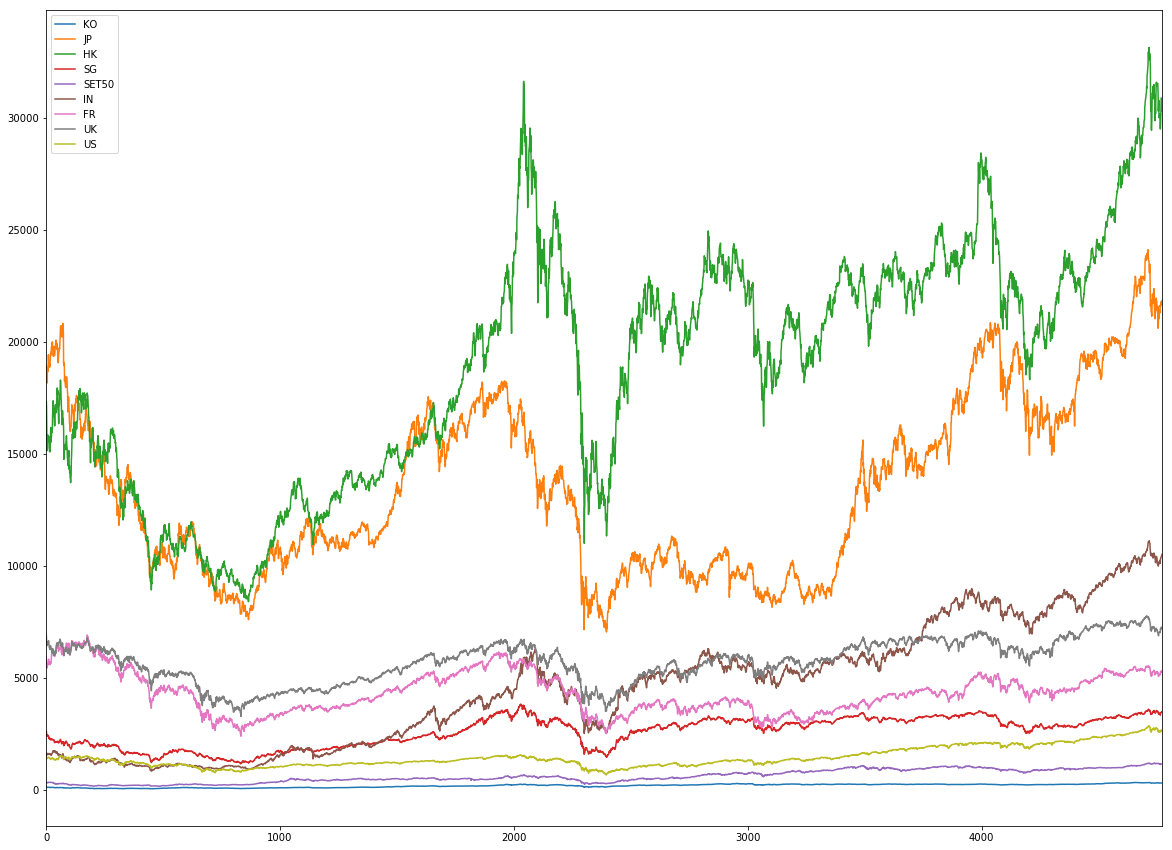

In [292]:
%matplotlib inline
_ = closing_data.plot(figsize=(20, 15))

In [293]:
for n in range(0,len(underlying_asset_name)):
    closing_data[underlying_asset_name[n]] = closing_data[underlying_asset_name[n]]/max(closing_data[underlying_asset_name[n]])


### max scale price

In [294]:
closing_data.index = closing_data['Dates']

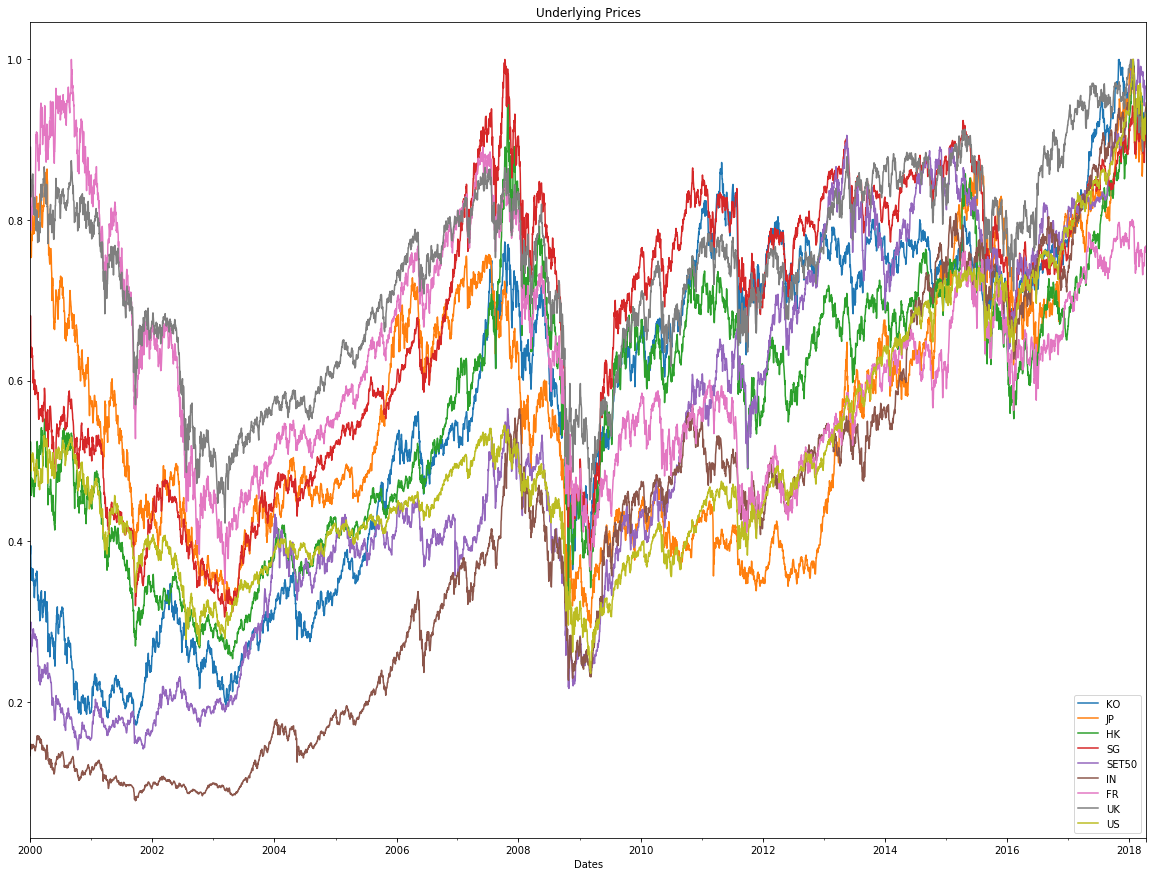

In [295]:
ax = closing_data.plot(figsize=(20, 15), title="Underlying Prices")

#### autocorr plot

You can see that, over the five-year period, these indices are correlated. Notice that sudden drops from economic events happened globally to all indices, and they otherwise exhibited general rises. This is an good start, though not the complete story. Next, plot autocorrelations for each of the indices. The autocorrelations determine correlations between current values of the index and lagged values of the same index. The goal is to determine whether the lagged values are reliable indicators of the current values. If they are, then we've identified a correlation.

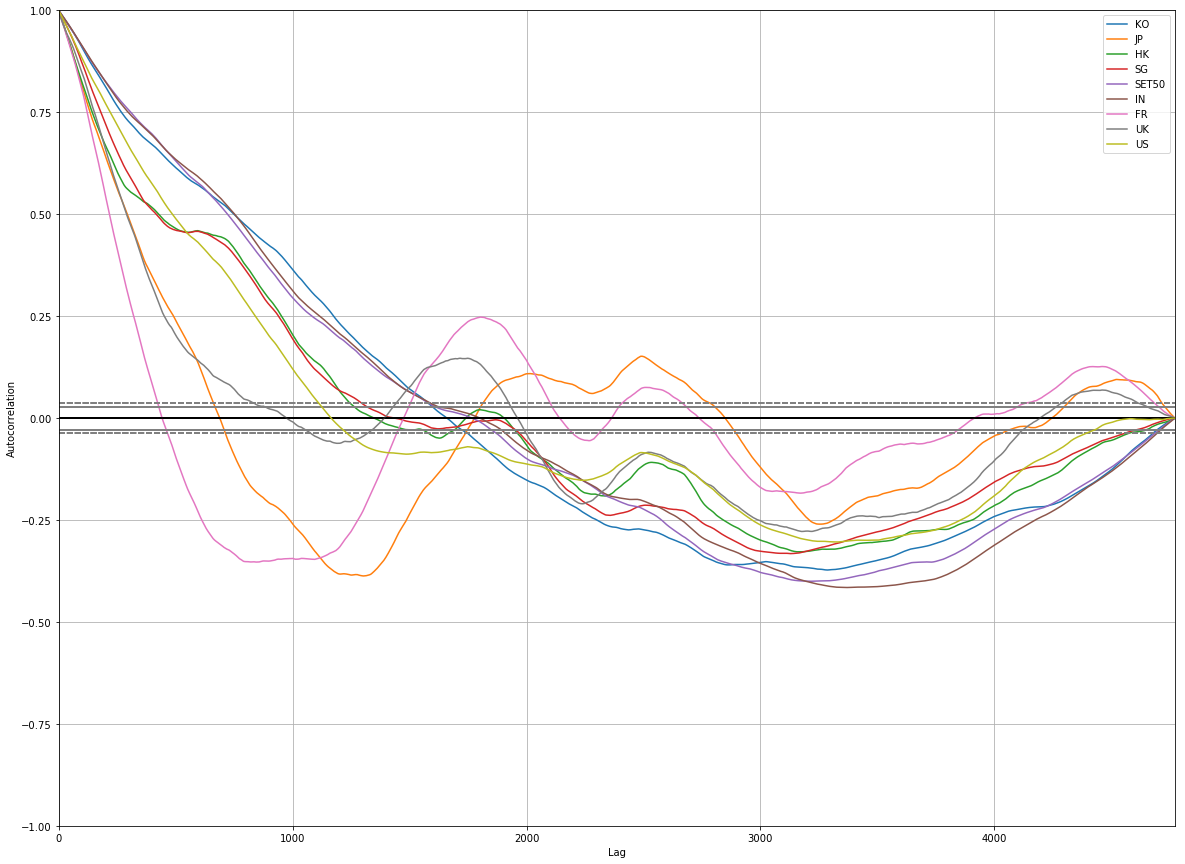

In [296]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

for n in range(0,len(underlying_asset_name)):
    _ = autocorrelation_plot(closing_data[underlying_asset_name[n]], label=underlying_asset_name[n])
    
_ = plt.legend(loc='upper right')

You should see strong autocorrelations, positive for around 1000 lagged days, then going negative. This tells us something we should intuitively know: if an index is rising it tends to carry on rising, and vice-versa. It should be encouraging that what we see here conforms to what we know about financial markets.

Next, look at a scatter matrix, showing everything plotted against everything, to see how indices are correlated with each other.

### log return

In [297]:
log_return_data = pd.DataFrame()
for n in range(0,len(underlying_asset_name)):
    log_return_data[underlying_asset_name[n]] = 100*np.log(closing_data[underlying_asset_name[n]]/closing_data[underlying_asset_name[n]].shift())

log_return_data = log_return_data.iloc[1:,:]
log_return_data.describe()

KO           JP           HK           SG        SET50  \
count  4771.000000  4771.000000  4771.000000  4771.000000  4771.000000   
mean      0.018558     0.003010     0.012171     0.006813     0.025385   
std       1.537094     1.473705     1.444636     1.119381     1.439740   
min     -12.738951   -12.111026   -13.582024    -8.695982   -17.230935   
25%      -0.589361    -0.672684    -0.611964    -0.495013    -0.614305   
50%       0.005638     0.000000     0.000000     0.000000     0.000000   
75%       0.724854     0.756822     0.696826     0.537609     0.720423   
max      11.539702    13.234585    13.406809     7.531083    11.431189   

                IN           FR           UK           US  
count  4771.000000  4771.000000  4771.000000  4771.000000  
mean      0.041118    -0.002403     0.000795     0.012581  
std       1.436582     1.435561     1.168821     1.192686  
min     -13.053862    -9.471537    -9.265572    -9.469514  
25%      -0.588696    -0.666995    -0.521131    -0.454737  
50%       0.024895     0.000000     0.000000     0.021257  
75%       0.752189     0.714898     0.568463     0.544402  
max      16.334315    10.594590     9.384339    10.957196

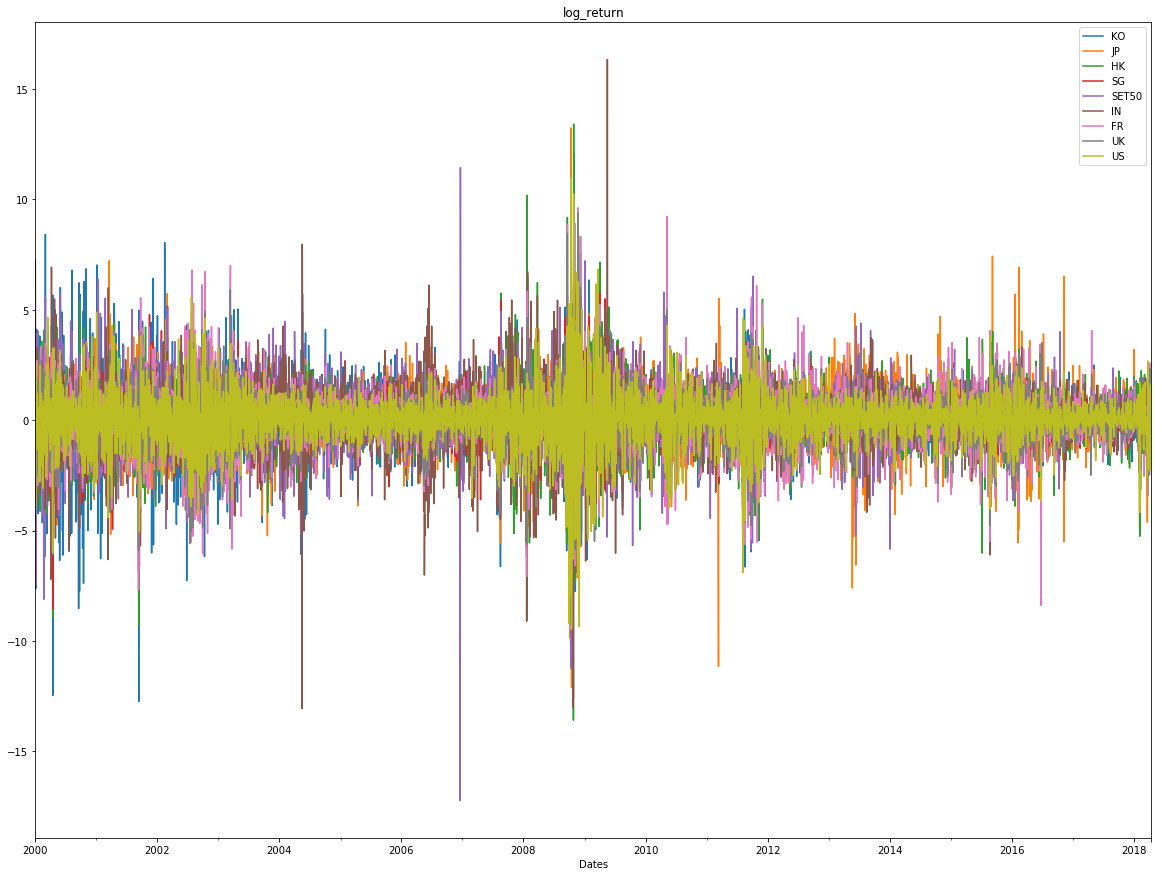

In [298]:
_ = log_return_data.plot(figsize=(20, 15), title="log_return")

#### autocorr plot

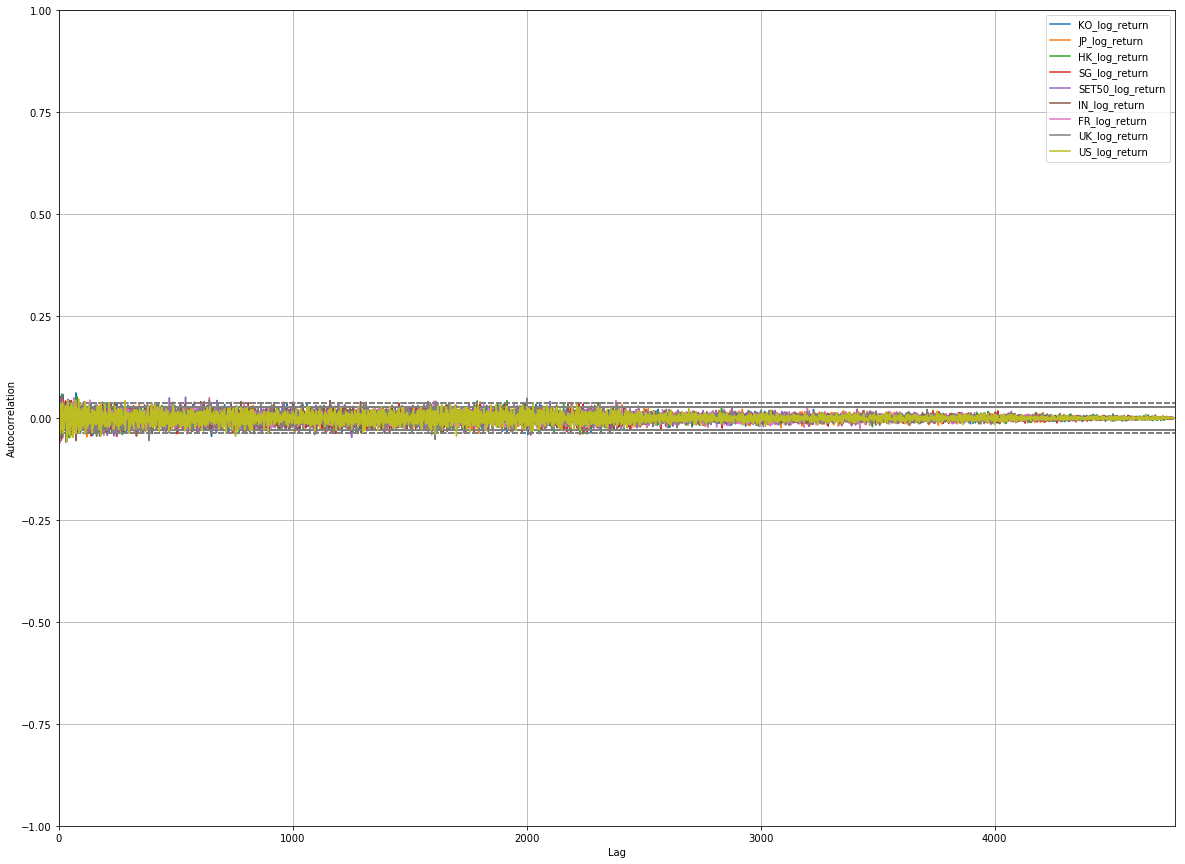

In [299]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

for n in range(0,len(underlying_asset_name)):
    _ = autocorrelation_plot(log_return_data[underlying_asset_name[n]], label=underlying_asset_name[n]+'_log_return')
    
_ = plt.legend(loc='upper right')

No autocorrelations are visible in the plot, which is what we're looking for. Individual financial markets are Markov processes, knowledge of history doesn't allow you to predict the future. 

You now have time series for the indices, stationary in the mean, similarly centered and scaled. That's great! Now start to look for signals to try to predict the close of the S&P 500. 

Look at a scatterplot to see how the log return indices correlate with each other.

### scatter matrix

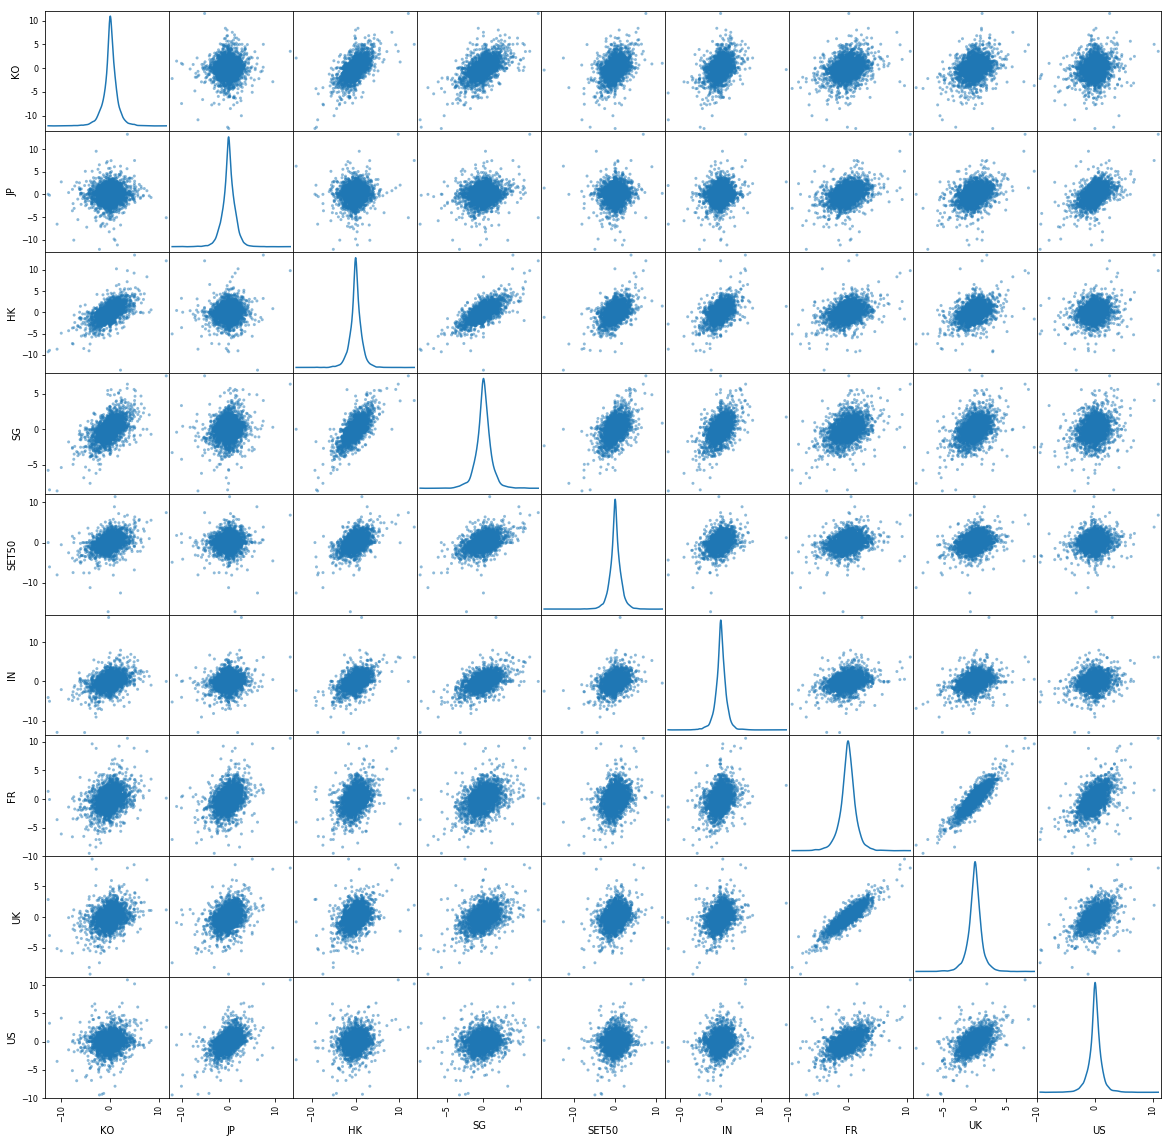

In [300]:
_ = scatter_matrix(log_return_data.dropna(), figsize=(20, 20), diagonal='kde')

### find a correlaiton

In [301]:
tmp = pd.DataFrame()
tmp_ind = underlying_asset_name.index('SET50')

for n in range(0,tmp_ind+1):
    tmp[underlying_asset_name[n]+'_0'] = log_return_data[underlying_asset_name[n]]
    
for n in range(tmp_ind+1,len(underlying_asset_name)):
    tmp[underlying_asset_name[n]+'_1'] = log_return_data[underlying_asset_name[n]].shift()

tmp.corr().iloc[:,tmp_ind]

KO_0       0.372006
JP_0       0.075726
HK_0       0.463957
SG_0       0.476209
SET50_0    1.000000
IN_1       0.071911
FR_1       0.144768
UK_1       0.149649
US_1       0.238420
Name: SET50_0, dtype: float64

In [302]:
tmp = pd.DataFrame()
tmp_ind = underlying_asset_name.index('UK')

for n in range(0,tmp_ind+1):
    tmp[underlying_asset_name[n]+'_0'] = log_return_data[underlying_asset_name[n]]
    
for n in range(tmp_ind+1,len(underlying_asset_name)):
    tmp[underlying_asset_name[n]+'_1'] = log_return_data[underlying_asset_name[n]].shift()

tmp.corr().iloc[:,tmp_ind]

KO_0       0.295013
JP_0       0.365580
HK_0       0.376159
SG_0       0.410945
SET50_0    0.286787
IN_0       0.330395
FR_0       0.880470
UK_0       1.000000
US_1       0.269571
Name: UK_0, dtype: float64

* noted that I want to use china but china has too few data set, I think I would find another index from china ??

## Underlying (USD adjust)

In [303]:
underlying_asset_name = ['KO', 'JP', 'HK', 'SG', 'SET50', 'IN', 'FR', 'UK', 'US']
volatility_asset_suffix = 'VIX'
exchange_rate_prefix = 'USD'

### adjust for USD

In [304]:
closing_data_USD = pd.DataFrame()
closing_data_USD['Dates'] = Data['Dates']
tmp_ind = underlying_asset_name.index('SET50')

for n in range(0,len(underlying_asset_name)):
    if n == tmp_ind :
        closing_data_USD[underlying_asset_name[n]] = Data[underlying_asset_name[n]]/Data['USDTH']
    else :
        closing_data_USD[underlying_asset_name[n]] = Data[underlying_asset_name[n]]/Data[exchange_rate_prefix+underlying_asset_name[n]]

closing_data_USD.describe()

KO           JP           HK           SG        SET50  \
count  4772.000000  4772.000000  4772.000000  4772.000000  4772.000000   
mean      0.174784   126.927972  2430.752826  1808.208760    18.013602   
std       0.072069    30.646931   692.143680   633.752557     9.629919   
min       0.044570    63.156899  1078.133494   670.420008     3.814782   
25%       0.097642   106.066186  1817.466558  1182.590014    10.144049   
50%       0.195595   122.422403  2586.900318  2017.779067    15.816756   
75%       0.231677   147.801716  2951.367222  2398.283278    26.796809   
max       0.317263   217.621477  4240.687635  2782.733463    38.557502   

                IN           FR            UK           US  
count  4772.000000  4772.000000   4772.000000  4772.000000  
mean     85.685111  5247.878104   9238.858892  1455.702362  
std      42.968736  1144.106012   1670.859763   455.038407  
min      17.790274  2630.408951   4880.011021   676.530000  
25%      40.247301  4464.501265   8207.620975  1136.897500  
50%      97.397099  5180.101938   9235.305977  1321.015000  
75%     119.976955  5869.603198  10208.340333  1693.942500  
max     175.037113  8471.606548  13980.033278  2872.870000

### max scale price

In [305]:
for n in range(0,len(underlying_asset_name)):
    closing_data_USD[underlying_asset_name[n]] = closing_data_USD[underlying_asset_name[n]]/max(closing_data_USD[underlying_asset_name[n]])

closing_data_USD.index = closing_data_USD['Dates']

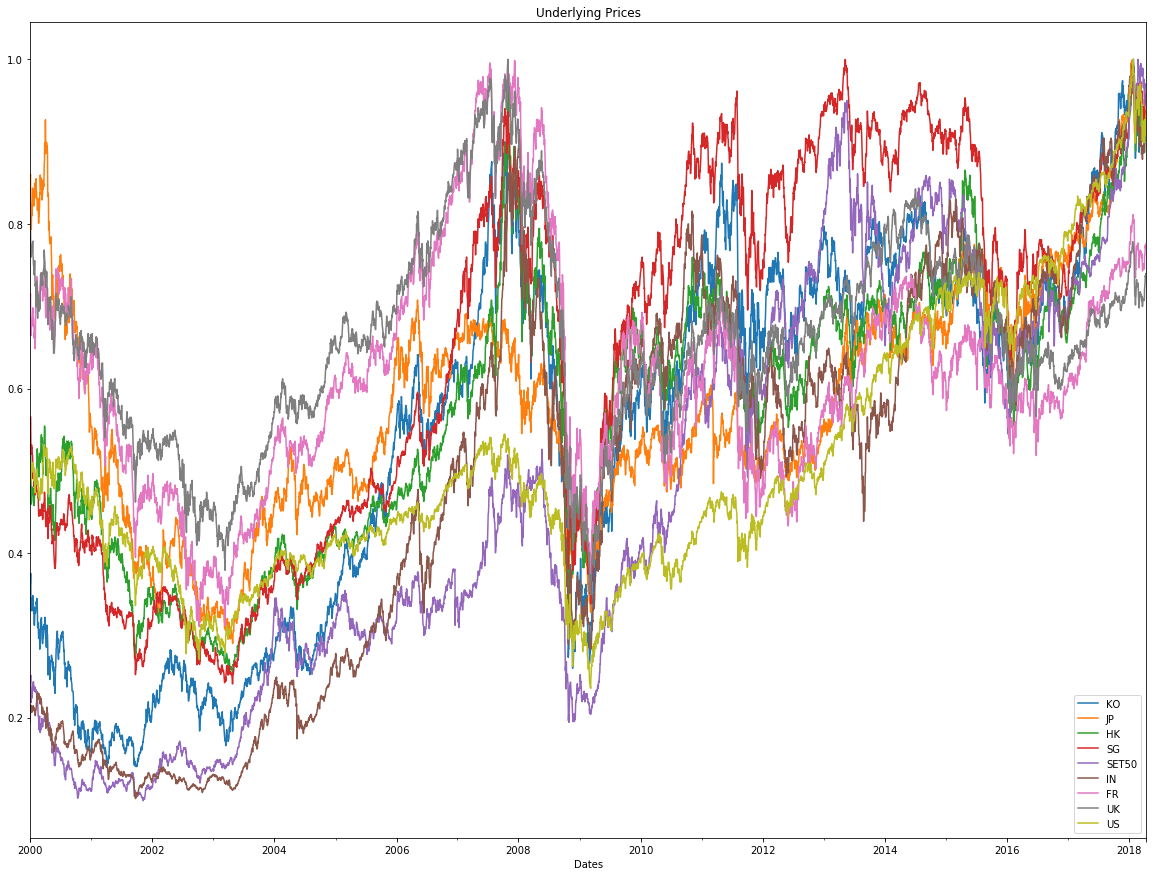

In [306]:
ax = closing_data_USD.plot(figsize=(20, 15), title="Underlying Prices")

#### autocorr plot

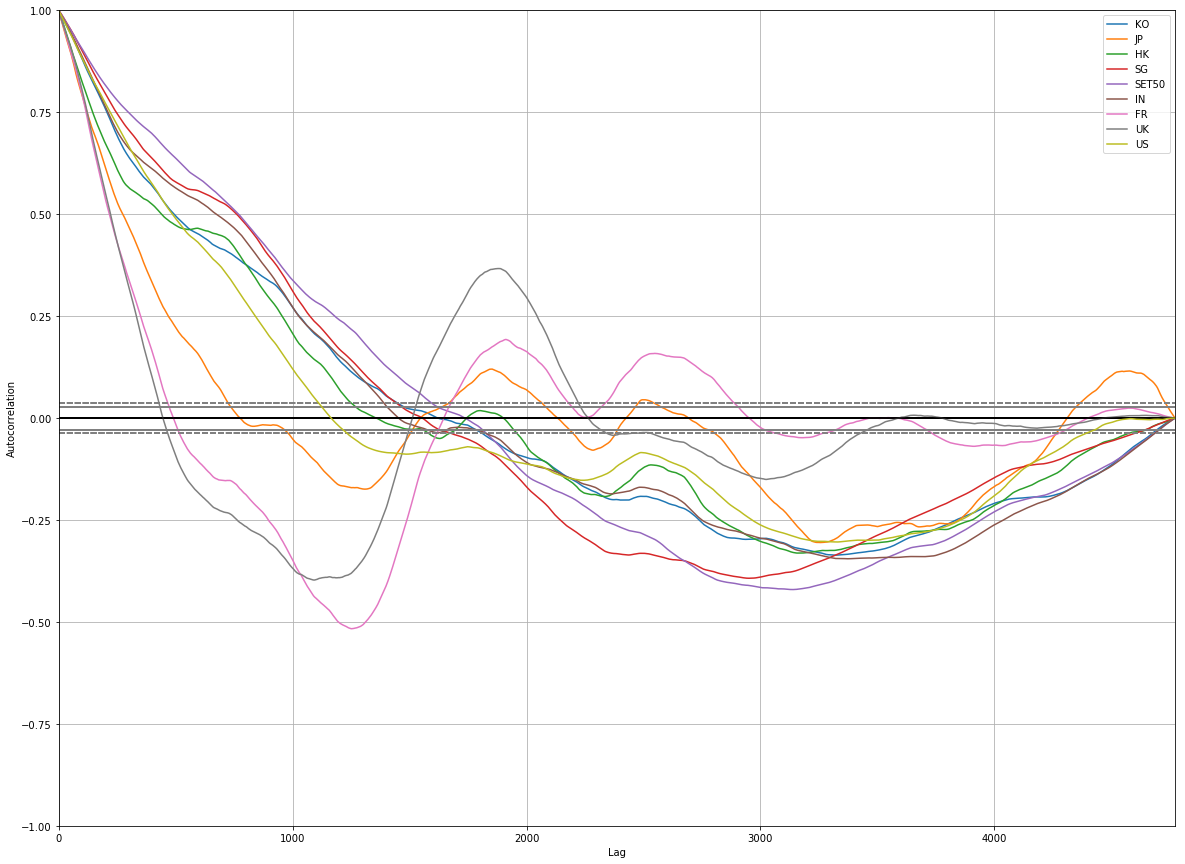

In [307]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

for n in range(0,len(underlying_asset_name)):
    _ = autocorrelation_plot(closing_data_USD[underlying_asset_name[n]], label=underlying_asset_name[n])
    
_ = plt.legend(loc='upper right')

### log return

In [308]:
log_return_data_USD = pd.DataFrame()
for n in range(0,len(underlying_asset_name)):
    log_return_data_USD[underlying_asset_name[n]] = 100*np.log(closing_data_USD[underlying_asset_name[n]]/closing_data_USD[underlying_asset_name[n]].shift())

log_return_data_USD = log_return_data_USD.iloc[1:,:]
log_return_data_USD.describe()

KO           JP           HK           SG        SET50  \
count  4771.000000  4771.000000  4771.000000  4771.000000  4771.000000   
mean      0.019810     0.002088     0.011966     0.011847     0.029224   
std       1.886658     1.452893     1.447084     1.211664     1.528241   
min     -20.300028   -10.896506   -13.589763    -9.087996   -16.748858   
25%      -0.787954    -0.739787    -0.611316    -0.540894    -0.686484   
50%       0.071702     0.016365     0.005129     0.031913     0.027910   
75%       0.918263     0.777092     0.696995     0.624754     0.773992   
max      24.775773    11.902482    13.436476     9.095149     9.568752   

                IN           FR           UK           US  
count  4771.000000  4771.000000  4771.000000  4771.000000  
mean      0.032565     0.001941    -0.001738     0.012581  
std       1.618020     1.589083     1.336772     1.192686  
min     -13.339828   -11.489604   -11.637227    -9.469514  
25%      -0.709480    -0.777188    -0.599741    -0.454737  
50%       0.054895     0.030031     0.027517     0.021257  
75%       0.839032     0.825574     0.662433     0.544402  
max      19.363436    12.490139    11.115397    10.957196

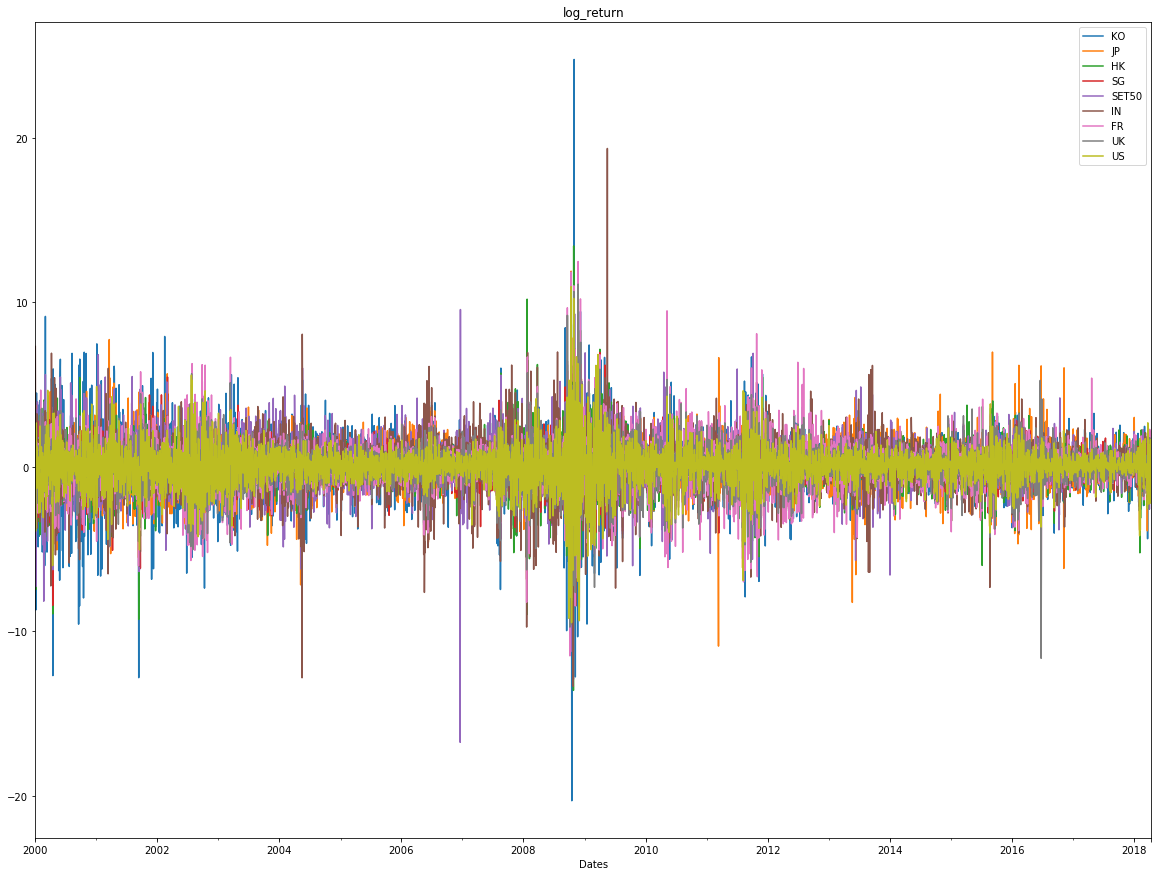

In [309]:
_ = log_return_data_USD.plot(figsize=(20, 15), title="log_return")

#### autocorr plot

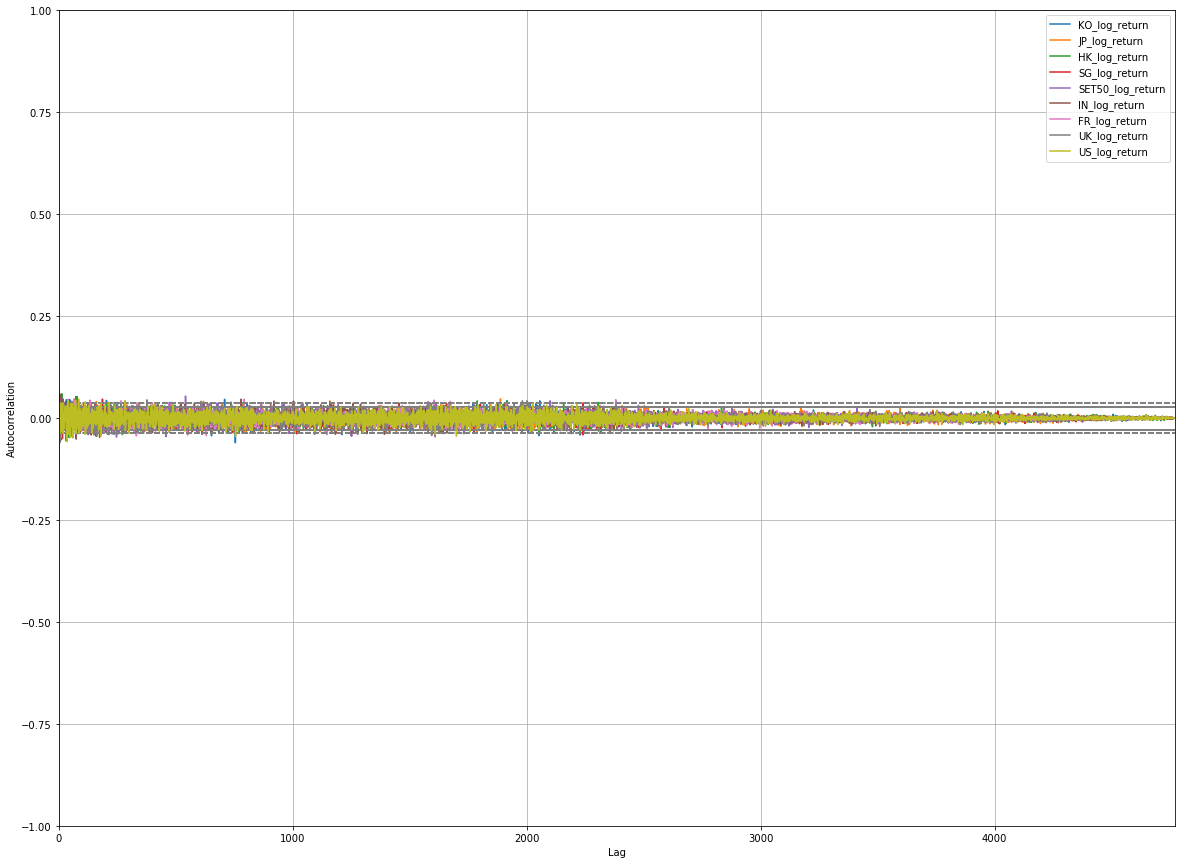

In [310]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

for n in range(0,len(underlying_asset_name)):
    _ = autocorrelation_plot(log_return_data_USD[underlying_asset_name[n]], label=underlying_asset_name[n]+'_log_return')
    
_ = plt.legend(loc='upper right')

### scatter matrix

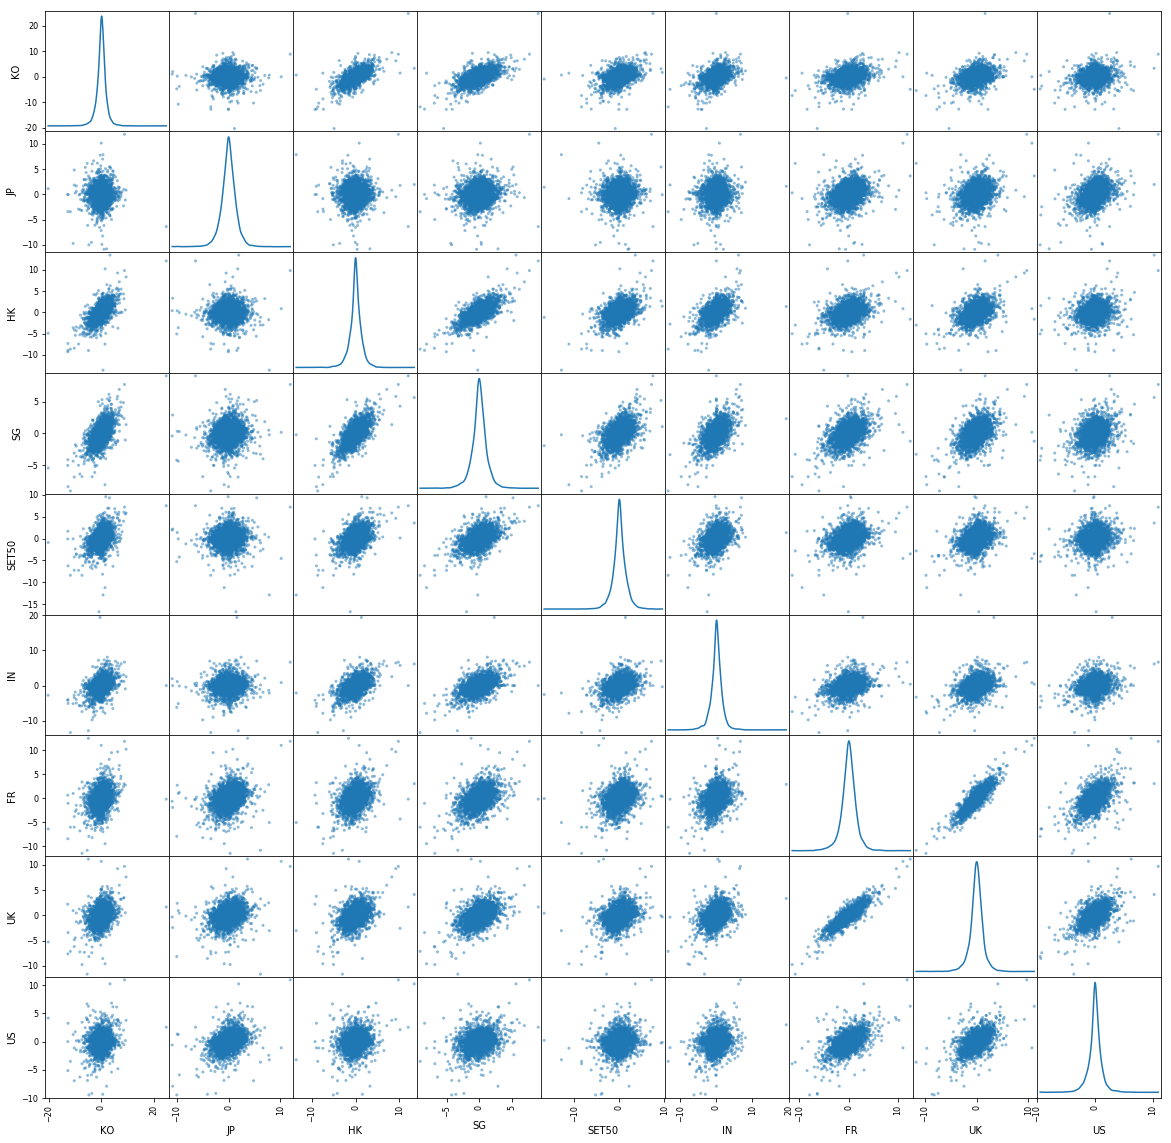

In [311]:
_ = scatter_matrix(log_return_data_USD.dropna(), figsize=(20, 20), diagonal='kde')

### find a correlation

In [312]:
tmp = pd.DataFrame()
tmp_ind = underlying_asset_name.index('SET50')

for n in range(0,tmp_ind+1):
    tmp[underlying_asset_name[n]+'_0'] = log_return_data_USD[underlying_asset_name[n]]
    
for n in range(tmp_ind+1,len(underlying_asset_name)):
    tmp[underlying_asset_name[n]+'_1'] = log_return_data_USD[underlying_asset_name[n]].shift()

tmp.corr().iloc[:,tmp_ind]

KO_0       0.404165
JP_0       0.059351
HK_0       0.464662
SG_0       0.496902
SET50_0    1.000000
IN_1       0.081379
FR_1       0.161963
UK_1       0.156013
US_1       0.234630
Name: SET50_0, dtype: float64

- over all correlation improve a little bit :D

In [ ]:
tmp = pd.DataFrame()
tmp_ind = underlying_asset_name.index('UK')

for n in range(0,tmp_ind+1):
    tmp[underlying_asset_name[n]+'_0'] = log_return_data_USD[underlying_asset_name[n]]
    
for n in range(tmp_ind+1,len(underlying_asset_name)):
    tmp[underlying_asset_name[n]+'_1'] = log_return_data_USD[underlying_asset_name[n]].shift()

tmp.corr().iloc[:,tmp_ind]

## Volatility asset

In [313]:
# drop 'SG' cuz no VIX
underlying_asset_name.remove('SG')
underlying_asset_name.remove('SET50')
underlying_asset_name

['KO', 'JP', 'HK', 'IN', 'FR', 'UK', 'US']

# try plot

In [ ]:
Data = pd.read_excel('180414_plot3_assetes.xlsx', 'S_ConstantU')

# Asymtotic standard Error for parameter

In [ ]:
op_methods = 'slsqp'
kbar = 10
LB = [1, 1, 0.001, 0.0001]
UB = [1.99, 50, 0.99999, 50]
send_out = 'LLs'
predict_period = 22
startingvals = []

In [ ]:
mo =
b = 
gamma_k = 
sigma = 

In [ ]:
re2 = MSM_likelihood_new(result.params['m0'].value, result.params['b'].value,
                         result.params['gamma_k'].value, result.params['sigma'].value, kbar, data2,
                         A, distribution, dof, send_out)

# REG and REPORT

## open

In [122]:
Data = pd.read_excel('170501Data_from_Output_OoS.xlsx', 'Sheet1')

Dates  EUVIX        EU      EUG1       EUG2       EUM       GOLD  \
0    1988-03-29    NaN       NaN  5.318929   5.459585       NaN        NaN   
1    1988-03-30    NaN       NaN  5.242701   5.396604       NaN        NaN   
2    1988-03-31    NaN       NaN  5.174162   5.340889       NaN        NaN   
3    1988-04-01    NaN       NaN  5.109752   5.289119       NaN        NaN   
4    1988-04-04    NaN       NaN  5.037177   5.229993       NaN        NaN   
5    1988-04-05    NaN       NaN  4.968091   5.174249       NaN        NaN   
6    1988-04-06    NaN       NaN  4.902134   5.121523       NaN        NaN   
7    1988-04-07    NaN       NaN  4.827865   5.061275       NaN        NaN   
8    1988-04-08    NaN       NaN  4.756908   5.004245       NaN        NaN   
9    1988-04-11    NaN       NaN  4.679763   4.941658       NaN        NaN   
10   1988-04-12    NaN       NaN  4.605829   4.882205       NaN        NaN   
11   1988-04-13    NaN       NaN  4.526969   4.818357       NaN        NaN   
12   1988-04-14    NaN       NaN  4.451410   4.757730       NaN        NaN   
13   1988-04-15    NaN       NaN  4.378208   4.699413       NaN        NaN   
14   1988-04-18    NaN       NaN  4.256530   4.596455       NaN        NaN   
15   1988-04-19    NaN       NaN  4.159377   4.516641       NaN        NaN   
16   1988-04-20    NaN       NaN  4.067083   4.441586       NaN        NaN   
17   1988-04-21    NaN       NaN  3.981803   4.373237       NaN        NaN   
18   1988-04-22    NaN       NaN  3.900364   4.308593       NaN        NaN   
19   1988-04-25    NaN       NaN  3.821889   4.246805       NaN        NaN   
20   1988-04-26    NaN       NaN  3.742171   4.183948       NaN        NaN   
21   1988-04-27    NaN       NaN  3.663979   4.122593       NaN        NaN   
22   1988-04-28    NaN       NaN  3.589748   4.064975       NaN        NaN   
23   1988-04-29    NaN  4.214332  3.521587   4.013026       NaN   9.209367   
24   1988-05-02    NaN  4.519618  3.451573   3.959319       NaN   9.284665   
25   1988-05-03    NaN  4.577800  3.390540   3.913953       NaN   9.330877   
26   1988-05-04    NaN  4.593059  3.333196   3.871937       NaN   9.311771   
27   1988-05-05    NaN  4.699357  3.278492   3.832271       NaN  12.180922   
28   1988-05-06    NaN  4.761229  3.228279   3.796661       NaN  12.120217   
29   1988-05-09    NaN  4.761941  3.181446   3.764048       NaN  12.019476   
...         ...    ...       ...       ...        ...       ...        ...   
7794 2018-02-12   9.41  7.487867  4.055157   4.620191  8.110818  10.147050   
7795 2018-02-13   9.14  7.430545  4.051947   4.617046  8.145999  10.014368   
7796 2018-02-14   9.45  7.448782  4.046893   4.612213  8.337869  10.092569   
7797 2018-02-15   9.32  6.953782  4.042669   4.608440  8.328034   8.595035   
7798 2018-02-16   9.13  6.903615  4.022170   4.589809  8.494440   8.585632   
7799 2018-02-19   9.13  6.843809  4.000895   4.570194  8.378751   8.545185   
7800 2018-02-20   9.31  7.336625  3.978584   4.549318  8.429957  10.115762   
7801 2018-02-21   8.93  7.151031  3.973296   4.544360  8.414502   9.144649   
7802 2018-02-22   8.65  7.139651  3.962019   4.544159  8.378294  10.173295   
7803        NaT   8.43  7.026689       NaN  29.071104  8.311850   9.983839   
7804        NaT   8.17  6.960514       NaN  28.096105  8.216521   9.945192   
7805        NaT   8.35  6.934167       NaN  28.152140  8.356714   9.872518   
7806        NaT   8.38  6.535944       NaN  27.958763  8.304058   9.081387   
7807        NaT   8.48  6.445976       NaN  26.924720  8.381049   9.081364   
7808        NaT   8.13  6.121265       NaN  25.932068  8.361073   9.073724   
7809        NaT   7.87  5.964445       NaN  25.168602  8.262026   8.950147   
7810        NaT   7.78  5.941586       NaN  24.402867  8.323122   8.925341   
7811        NaT   7.71  5.642783       NaN  23.539827  8.211666   8.123624   
7812        NaT   7.59  5.639551       NaN  24.119240  8.415736   7.784352   
7813        NaT   7.11  4.945455

In [17]:
# read data
asset = ('SPX', 'GOLD', 'EU')
vol_asset =  ('VIX','GVZ', 'EUVIX')
for i in range(0,len(asset)):
    exec(eval("asset["+str(i)+"]") + "= Data.loc[5273:7802,asset[" + str(i) + "]]")
    exec(eval("asset["+str(i)+"]") + "_g1 = Data.loc[5273:7802,'"+eval("asset[" + str(i) + "]")+"G1']")
    exec(eval("asset["+str(i)+"]") + "_g2 = Data.loc[5273:7802,'"+eval("asset[" + str(i) + "]")+"G2']")
    exec(eval("asset["+str(i)+"]") + "_msm = Data.loc[5273:7802,'"+eval("asset[" + str(i) + "]")+"M']")
    
for i in range(0,len(asset)):
    exec(eval("vol_asset["+str(i)+"]") + "= Data.loc[5273:7802,vol_asset[" + str(i) + "]]")
   

In [30]:
Data.describe()

EUVIX           EU         EUG1         EUG2          EUM  \
count  2665.000000  7801.000000  7803.000000  7824.000000  2551.000000   
mean     11.028856     9.371468     6.341549     6.228347     9.606166   
std       3.788101     3.103874     3.295137     2.972265     1.660955   
min       4.430000     1.400183     1.431282     1.407752     6.293873   
25%       8.430000     7.245899     4.109491     4.506620     8.318155   
50%      10.450000     9.023409     5.559756     5.695818     9.502231   
75%      12.760000    10.982990     7.783598     7.497549    11.075066   
max      29.670000    24.730776    26.417298    29.071104    12.943564   

              GOLD          GVZ       GOLDG1       GOLDG2        GOLDM  \
count  7801.000000  2530.000000  7803.000000  7803.000000  2551.000000   
mean     14.050291    20.317028    16.126306    16.260926    18.509589   
std       6.842765     7.740350    15.408825    13.554868     4.589762   
min       2.587384     9.430000     1.528932     1.196875    12.147442   
25%       9.605824    15.600000     7.456859     8.331721    14.732490   
50%      12.554230    18.470000    11.546458    12.650421    17.860373   
75%      16.861198    22.630000    19.190922    19.628277    20.670479   
max      56.331468    64.530000   135.531239   112.833051    34.229521   

               SPX          VIX        SPXG1        SPXG2         SPXM  \
count  7801.000000  2665.000000  7824.000000  7824.000000  2551.000000   
mean     14.726282    19.995411    18.808258    18.561956    15.446485   
std       8.688021     9.886707    27.538698    28.210360     4.679022   
min       1.463459     9.140000     2.881299     0.000000     8.812919   
25%       9.420338    13.570000     7.460314     7.149064    12.166334   
50%      12.529108    17.070000    11.034442    10.807192    14.152509   
75%      17.442329    23.040000    20.731378    20.113239    18.423020   
max      87.960918    80.860000   296.881349   336.175365    25.804518   

             GOLDu         SPXu          EUu  
count  7824.000000  7824.000000  7824.000000  
mean    685.730164  1115.403174     1.213631  
std     450.164117   578.858465     0.148701  
min     252.550000   250.830000     0.827200  
25%     352.237500   578.157500     1.117600  
50%     403.825000  1131.965000     1.229900  
75%    1142.700000  1402.340000     1.318800  
max    1900.230000  2872.870000     1.599100

## Regression

### def reg_report

In [257]:
def reg_report(x,y,constant='y'):
    # y = mx+c
    if constant == 'y':
        x2 = sm.add_constant(x)
    else:
        x2 = x    
    est = sm.OLS(y, x2)
    est2 = est.fit()
#     print(est2.summary())
#     print("MODEL MSE",est2.mse_resid)
#     print("MODEL TSE",est2.mse_total)
    
    return est2

    

### def build_RegTable

In [260]:
# beautiful print
import shutil
columns = shutil.get_terminal_size().columns


In [277]:
index1 = asset
index2 = ['GARCH','MSGARCH','MSM']
index3 = ['coefficient','p-value']
column1 = ['Assets' , 'Model', 'values']
column2 = ['m','c','R-square']
val = [['params[0]','params[1]','rsquared_adj'],['pvalues[0]','pvalues[1]','f_pvalue']]

def build_RegTable(index1,index2,index3,column1):
    
    dum = df()
    for i in range(0,len(index1)):
        for j in range(0,len(index2)):
            for k in range(0,len(index3)):
                dum.loc[len(index1)*len(index2)*i+len(index2)*j+k,0] = index1[i]
                dum.loc[len(index1)*len(index2)*i+len(index2)*j+k,1] = index2[j]
                dum.loc[len(index1)*len(index2)*i+len(index2)*j+k,2] = index3[k]
    
    dum.columns = column1
    dum = dum.set_index(column1)

    return dum.copy()


def fill_RegTable(df_in,locindex1,locindex2,index3,column2,val,model):
    if len(model.params) == 1:
        for i in range(0,len(index3)):
            # coeff / p
            for j in [0,2]:
                # exact values
                
                value = eval("model."+val[i][j])
                
                if i ==0 :
                    df_in.loc[(locindex1,locindex2,index3[i]),column2[j]]=round(value,3)
                elif i == 1:
                    df_in.loc[(locindex1,locindex2,index3[i]),column2[j]]='('+str(round(value,4))+')'
    
    else:
        for i in range(0,len(index3)):
            # coeff / p
            for j in range(0,len(column1)):
                # exact values
           
                value = eval("model."+val[i][j])
                if i ==0 :
                    df_in.loc[(locindex1,locindex2,index3[i]),column2[j]]=round(value,3)
                elif i == 1:
                    df_in.loc[(locindex1,locindex2,index3[i]),column2[j]]='('+str(round(value,4))+')'
    
    return df_in

### REG jing jing 

In [278]:
reg_Table_normal = build_RegTable(index1,index2,index3,column1)
reg_Table_noCon = build_RegTable(index1,index2,index3,column1)

for i in range(0,len(index1)):
    # asset
    exec("y =" + eval("vol_asset["+str(i)+"]"))
    print("\n=="+asset[i]+"==")
    
    for j in range(0,len(index2)):
        #model
        if j==0:
            print("\n"+"==========GARCH==========".center(columns))
            exec("x ="+ eval("asset["+str(i)+"]")+"_g1")
            est = reg_report(x,y)
            _ = fill_RegTable(reg_Table_normal,index1[i],index2[j],index3,column2,val,est)
            
            est2 = reg_report(x,y,'n')
            _ = fill_RegTable(reg_Table_noCon,index1[i],index2[j],index3,column2,val,est2)
                
        elif j==1:
            print("\n"+"==========MSGARCH==========".center(columns))
            exec("x ="+ eval("asset["+str(i)+"]")+"_g2")
            
            est = reg_report(x,y)
            _ = fill_RegTable(reg_Table_normal,index1[i],index2[j],index3,column2,val,est)
            
            est2 = reg_report(x,y,'n')
            _ = fill_RegTable(reg_Table_noCon,index1[i],index2[j],index3,column2,val,est2)
            
        elif j==2:
            print("\n"+"==========MSM==========".center(columns))
            exec("x ="+ eval("asset["+str(i)+"]")+"_msm")
            
            est = reg_report(x,y)
            _ = fill_RegTable(reg_Table_normal,index1[i],index2[j],index3,column2,val,est)
            
            est2 = reg_report(x,y,'n')
            _ = fill_RegTable(reg_Table_noCon,index1[i],index2[j],index3,column2,val,est2)


==SPX==

                                               ==========GARCH==========                                                

                                              ==========MSGARCH==========                                               

                                                ==========MSM==========                                                 

==GOLD==

                                               ==========GARCH==========                                                

                                              ==========MSGARCH==========                                               

                                                ==========MSM==========                                                 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:196: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)



==EU==

                                               ==========GARCH==========                                                

                                              ==========MSGARCH==========                                               

                                                ==========MSM==========                                                 


In [279]:
reg_Table_noCon

m R-square
Assets Model   values                     
SPX    GARCH   coefficient  0.345    0.624
               p-value      (0.0)    (0.0)
       MSGARCH coefficient  0.335    0.603
               p-value      (0.0)    (0.0)
       MSM     coefficient  1.332    0.934
               p-value      (0.0)    (0.0)
GOLD   GARCH   coefficient  0.642    0.773
               p-value      (0.0)    (0.0)
       MSGARCH coefficient   0.72    0.846
               p-value      (0.0)    (0.0)
       MSM     coefficient   1.12    0.969
               p-value      (0.0)    (0.0)
EU     GARCH   coefficient  1.429    0.922
               p-value      (0.0)    (0.0)
       MSGARCH coefficient  1.563    0.947
               p-value      (0.0)    (0.0)
       MSM     coefficient  1.177    0.958
               p-value      (0.0)    (0.0)

# adjust for volatility premium

## Degree of risk aversion

In [11]:
riskAversion_Function_name = ('Ratio','Power','exp')
asset = ('SPX', 'GOLD', 'EU')
vol_asset =  ('VIX','GVZ', 'EUVIX')
days = 2530

In [12]:
Data = pd.read_excel('170501Data_from_Output_OoS.xlsx', 'Sheet1')
Data = Data.dropna()
Data.describe()

EUVIX           EU         EUG1         EUG2          EUM  \
count  2530.000000  2530.000000  2530.000000  2530.000000  2530.000000   
mean     11.081142     9.482925     6.661508     6.394630     9.617176   
std       3.868463     3.588672     4.228130     3.536460     1.663392   
min       4.430000     2.950733     1.431282     1.407752     6.293873   
25%       8.390000     7.044486     3.940254     4.315761     8.329773   
50%      10.505000     8.819847     5.263192     5.449242     9.522466   
75%      12.900000    11.488066     8.550430     8.115281    11.092859   
max      29.670000    24.730776    26.417298    22.426194    12.943564   

              GOLD          GVZ       GOLDG1       GOLDG2        GOLDM  \
count  2530.000000  2530.000000  2530.000000  2530.000000  2530.000000   
mean     16.391102    20.317028    21.445306    21.363046    18.554929   
std       7.554744     7.740350    20.658940    17.771416     4.581363   
min       6.002866     9.430000     5.636467     6.979798    12.335311   
25%      11.304612    15.600000     9.909618    10.281229    14.776915   
50%      14.348640    18.470000    14.365969    15.862245    17.886010   
75%      19.215777    22.630000    23.181914    24.012106    20.725423   
max      56.331468    64.530000   135.531239   112.833051    34.229521   

          ...               VIX        SPXG1        SPXG2         SPXM  \
count     ...       2530.000000  2530.000000  2530.000000  2530.000000   
mean      ...         19.850221    25.293701    24.823691    15.450015   
std       ...         10.086272    44.247100    45.276452     4.698141   
min       ...          9.140000     2.881299     2.884624     8.812919   
25%       ...         13.430000     7.838337     7.298219    12.154607   
50%       ...         16.700000    10.975876    10.835717    14.097190   
75%       ...         22.547500    21.506600    20.145138    18.467480   
max       ...         80.860000   296.881349   336.175365    25.804518   

             GOLDu        GOLDr         SPXu         SPXr          EUu  \
count  2530.000000  2530.000000  2530.000000  2530.000000  2530.000000   
mean   1283.093842     0.016924  1637.691233     0.025717     1.275452   
std     238.998754     1.139210   502.756586     1.263157     0.125335   
min     712.300000    -9.548214   676.530000    -9.469514     1.038800   
25%    1158.225000    -0.523031  1215.030000    -0.359011     1.142825   
50%    1261.585000     0.036269  1563.150000     0.031925     1.300200   
75%    1385.232500     0.591172  2066.632500     0.524126     1.364300   
max    1900.230000    10.242579  2872.870000    10.957196     1.593800   

               EUr  
count  2530.000000  
mean     -0.008888  
std       0.638862  
min      -2.433896  
25%      -0.372115  
50%       0.003531  
75%       0.331132  
max       3.450571  

[8 rows x 21 columns]

## Train & TEST newV

### store R-sq

In [44]:
all_rsq = df()
all_rsq['method'] = 'a'
all_rsq.loc[str(len(riskAversion_Function_name)+1),'method'] = "initial R-sq"
for i in range(0,len(riskAversion_Function_name)):
    all_rsq.loc[i,'method'] = riskAversion_Function_name[i]
# all_rsq.loc[str(len(riskAversion_Function_name)+1),'method'] = "File_name"

for i in range(0,len(asset)):
    all_rsq[eval("asset["+str(i)+"]")] = 0.
#     all_rsq.loc[str(len(riskAversion_Function_name)+1),eval("asset["+str(i)+"]")] = all_file_name[i]
lambda_value = all_rsq.copy(deep=True)

In [7]:
all_rsq

method  SPX  GOLD   EU
4  initial R-sq  0.0   0.0  0.0
0         Ratio  0.0   0.0  0.0
1         Power  0.0   0.0  0.0
2           exp  0.0   0.0  0.0

### MSM 


                             OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 3.554e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:35   Log-Likelihood:                -8010.4
No. Observations:                2530   AIC:                         1.602e+04
Df Residuals:                    2529   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPXM           1.3322      0.007    188.518      0

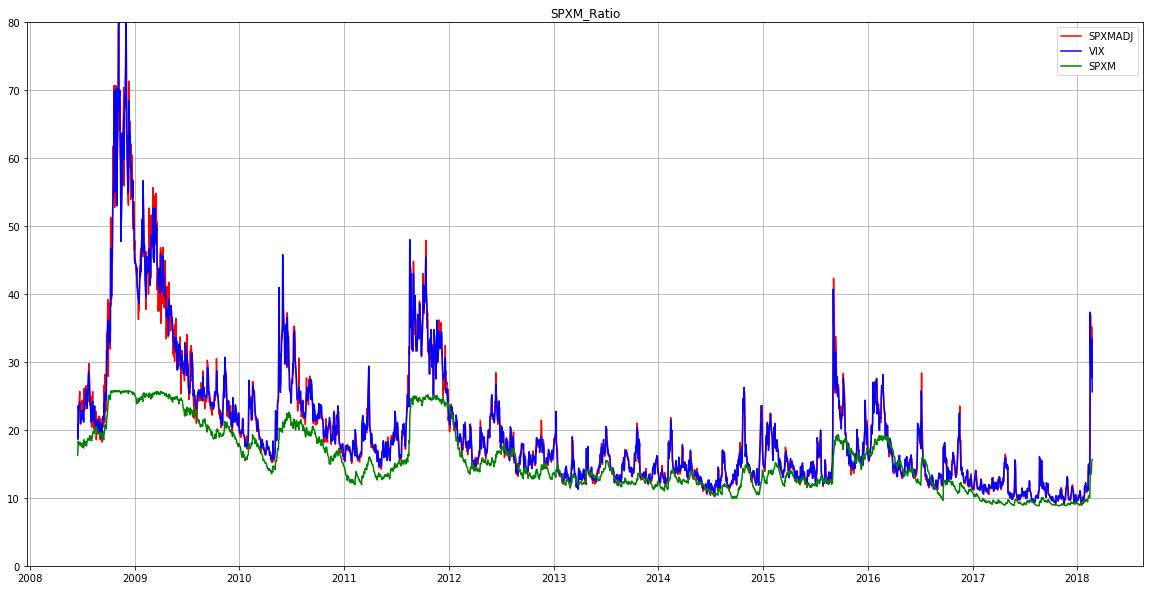

1
                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.887e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:35   Log-Likelihood:                -3962.5
No. Observations:                2529   AIC:                             7929.
Df Residuals:                    2527   BIC:                             7941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4332      0.050      8.613      0

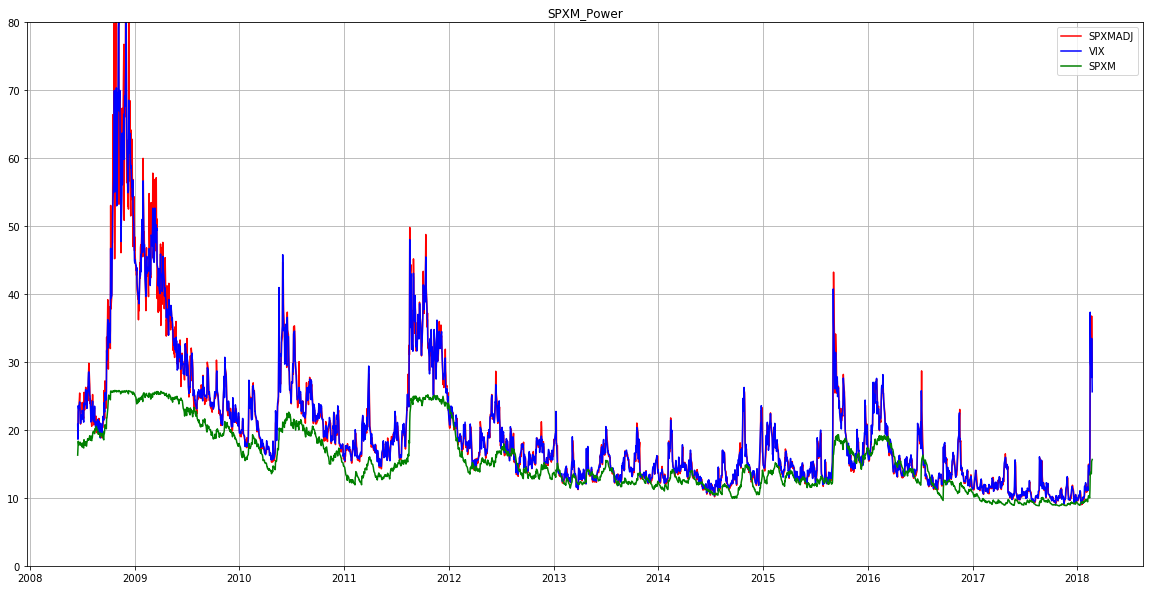

2
                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.238e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:36   Log-Likelihood:                -4486.9
No. Observations:                2529   AIC:                             8978.
Df Residuals:                    2527   BIC:                             8989.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7403      0.061     12.082      0

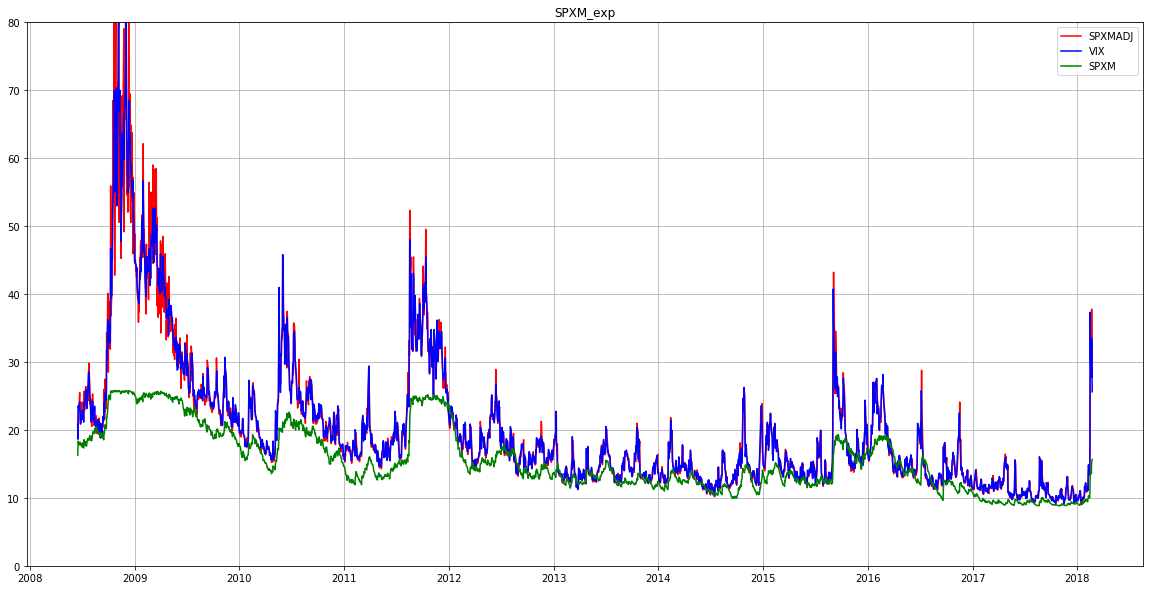

3
                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 9.590e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:36   Log-Likelihood:                -4802.5
No. Observations:                2529   AIC:                             9609.
Df Residuals:                    2527   BIC:                             9621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9396      0.069     13.616      0

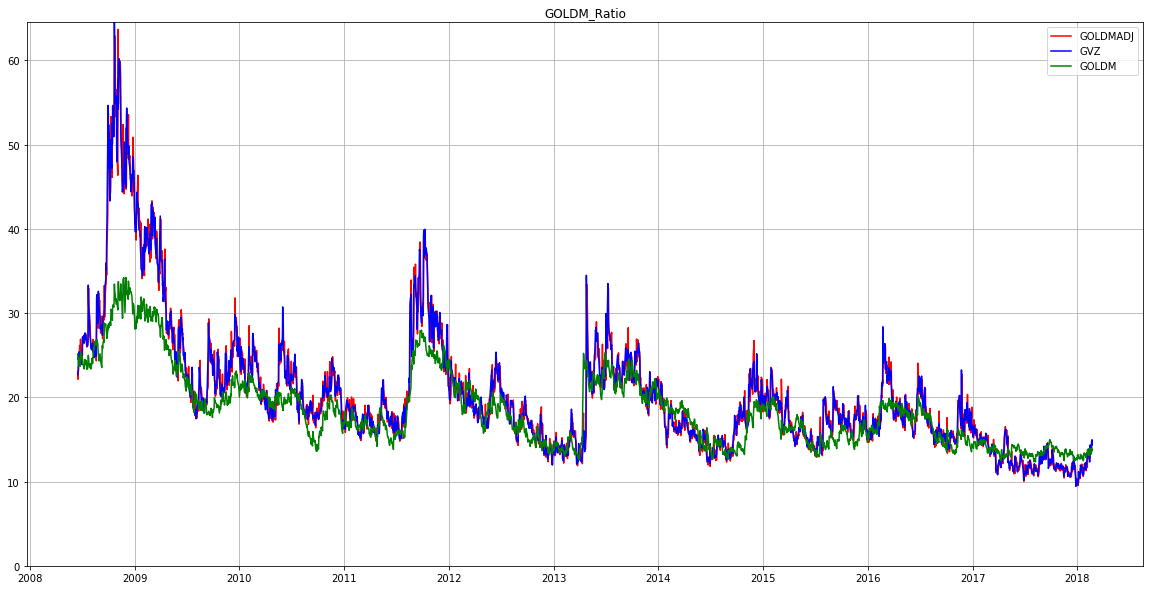

4
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 7.562e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:37   Log-Likelihood:                -4424.7
No. Observations:                2529   AIC:                             8853.
Df Residuals:                    2527   BIC:                             8865.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3991      0.078      5.147      0

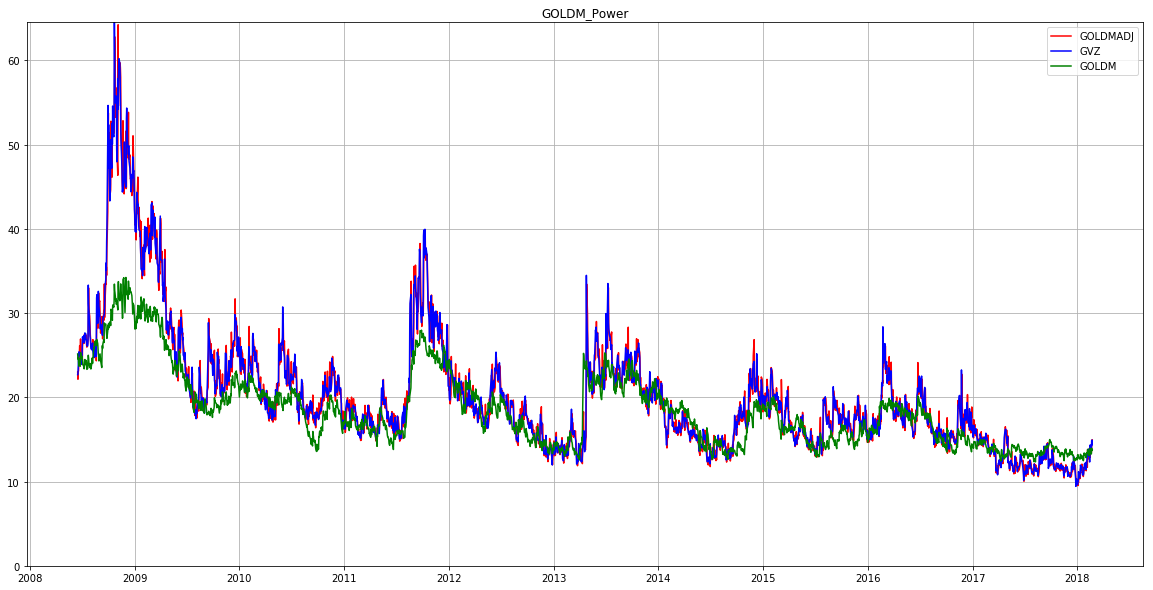

5
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 7.523e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:37   Log-Likelihood:                -4431.0
No. Observations:                2529   AIC:                             8866.
Df Residuals:                    2527   BIC:                             8878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3983      0.078      5.124      0

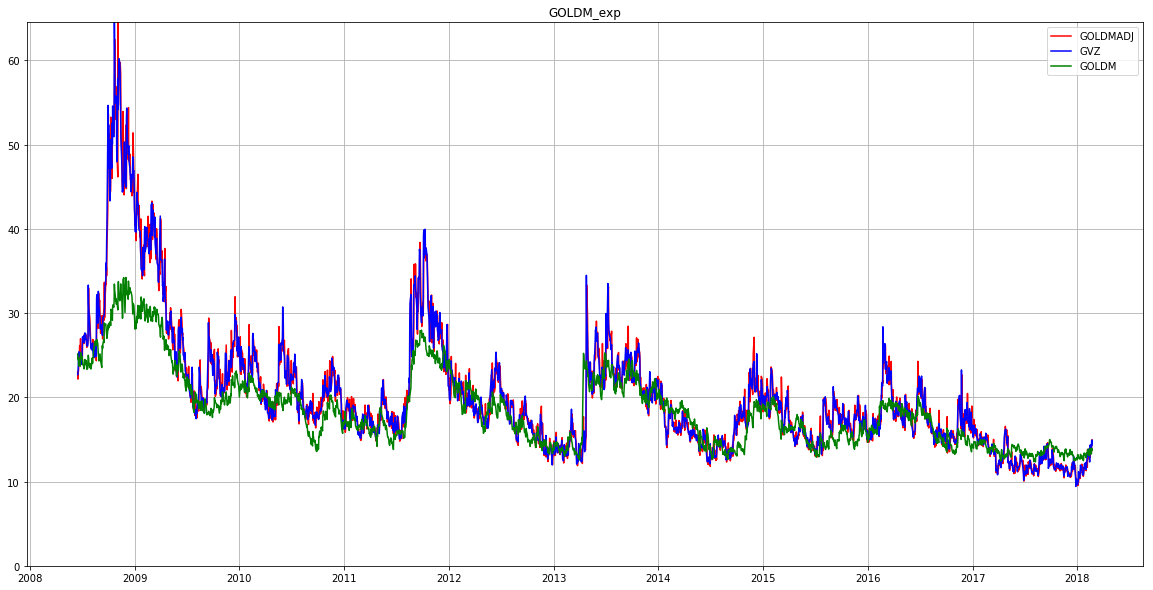

6
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 7.310e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:38   Log-Likelihood:                -4466.2
No. Observations:                2529   AIC:                             8936.
Df Residuals:                    2527   BIC:                             8948.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4219      0.079      5.356      0

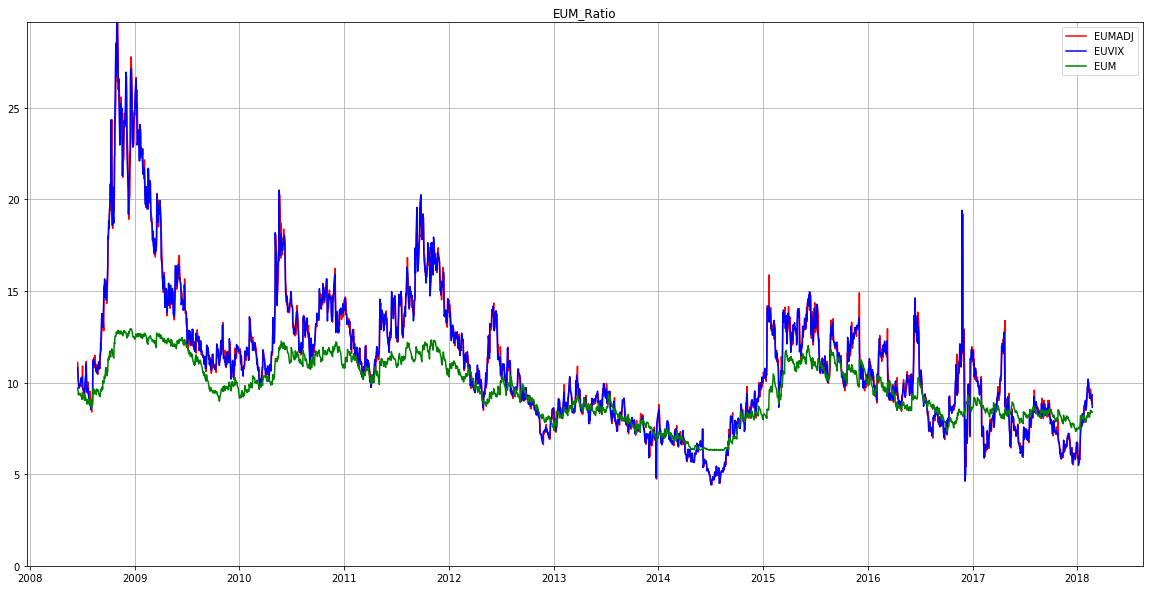

7
                            OLS Regression Results                            
Dep. Variable:                  EUVIX   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.054e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:38   Log-Likelihood:                -2262.4
No. Observations:                2529   AIC:                             4529.
Df Residuals:                    2527   BIC:                             4541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1582      0.036      4.439      0

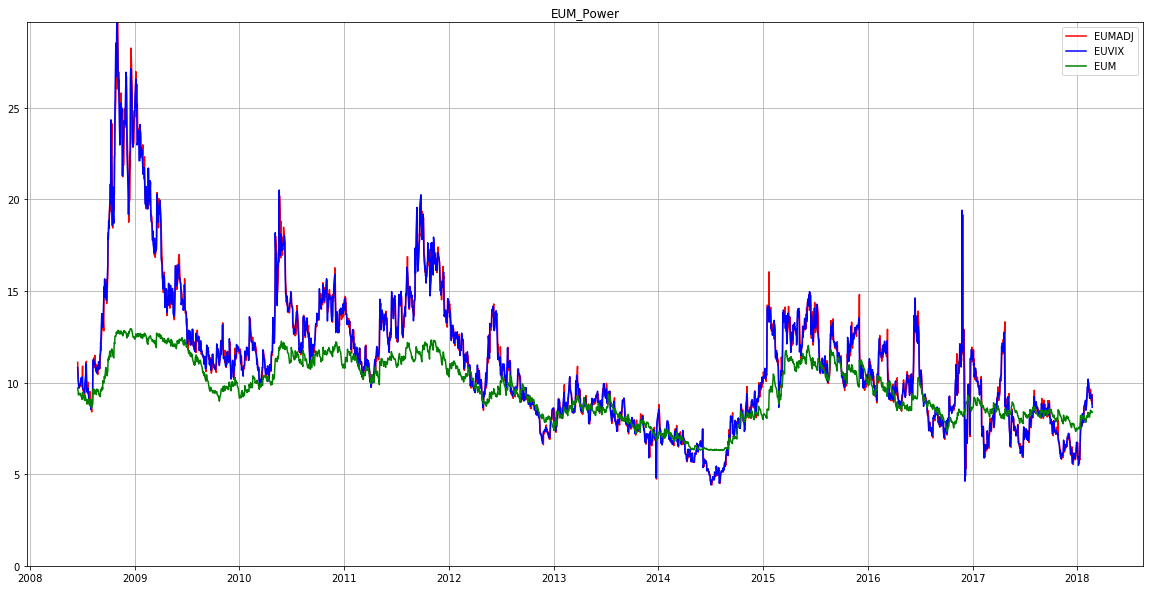

8
                            OLS Regression Results                            
Dep. Variable:                  EUVIX   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:39   Log-Likelihood:                -2268.1
No. Observations:                2529   AIC:                             4540.
Df Residuals:                    2527   BIC:                             4552.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.036      4.637      0

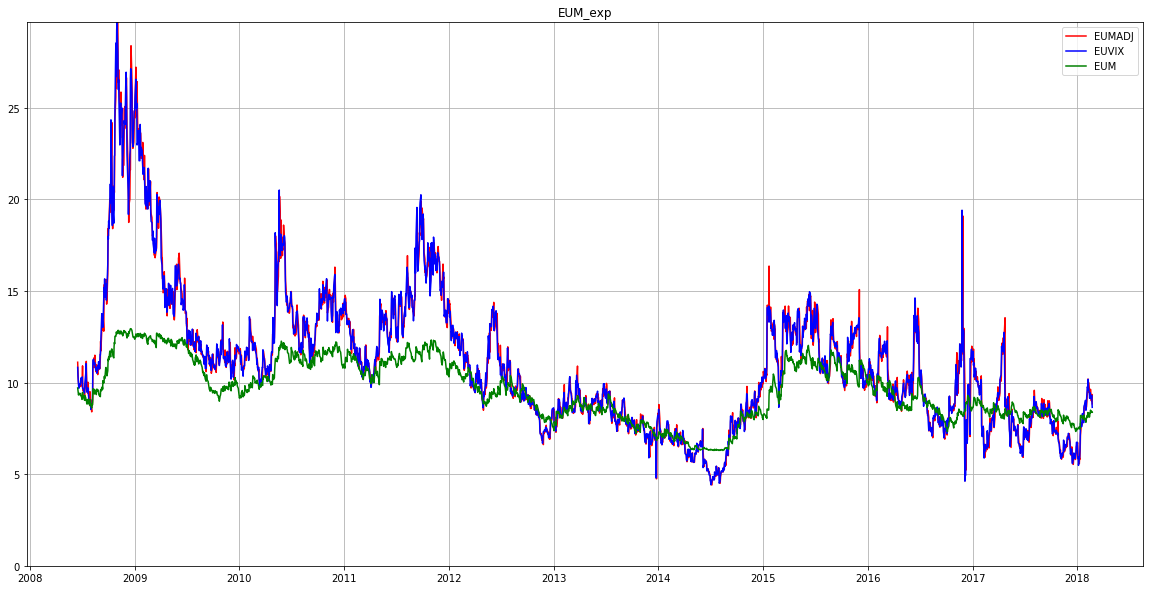

9
                            OLS Regression Results                            
Dep. Variable:                  EUVIX   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.032e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:15:39   Log-Likelihood:                -2288.8
No. Observations:                2529   AIC:                             4582.
Df Residuals:                    2527   BIC:                             4593.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1729      0.036      4.806      0

In [45]:
count = 0

for i in range(0,len(asset)):
    
    # unbox
    
    name_asset = asset[i]
    name_vix = vol_asset[i]
    name_process = asset[i]+"M"
    
    x = Data.loc[:,name_process]
    x = df(x.iloc[-days:])
    y = Data.loc[:,vol_asset[i]]
    y = df(y.iloc[-days:])
    #y=mx
    est = sm.OLS(y, x)
    est2 = est.fit()
    print('\n',est2.summary())
    print("MODEL MSE",est2.mse_resid)
    print("MODEL TSE",est2.mse_total)
    
    #save r**2 initial
    rsq_init = est2.rsquared
    all_rsq.iloc[0,i+1] = rsq_init
    
    for j in range(0,len(riskAversion_Function_name)):
        
        name_function = riskAversion_Function_name[j]
        
        dum_Data = Data.loc[:,(name_vix,name_asset+'r','Dates',name_process)].copy(deep=True)
        dum_Data['realize_A('+name_function+')'] = 0.
        dum_Data['Diff'] = 0.
        dum_Data['New_Diff'] = 0.
        dum_Data[name_process+'ADJ'] = 0.
        dum_Data = dum_Data.reset_index(drop=True)
        
        # 0) calculation
        if j == 0 :
            # power
            dum_Data['realize_A('+name_function+')'] = dum_Data.iloc[:,0]/dum_Data.iloc[:,3]
        elif j ==1 :
            # ln_power
            dum_Data['realize_A('+name_function+')'] = np.log(dum_Data.iloc[:,0]/dum_Data.iloc[:,3])
        elif j==2 :
            # expMSM
            dum_Data['realize_A('+name_function+')'] = np.log(dum_Data.iloc[:,0])/np.log(dum_Data.iloc[:,3])
            
        AA = dum_Data['realize_A('+name_function+')']


        # shift downward
        dum_Data['Diff'] = AA - AA.shift(1)
# CHANGE use log
#         dum_Data['Diff'] = np.log(AA) - np.log(AA.shift(1))
        
        y = dum_Data.loc[1:,"Diff"]#.values.reshape(len(dum_Data),1)
        x = dum_Data.iloc[1:,1]
        
# CAHNGE add const
        # 1) reg y=mx to fit the a for multipliler
        x2 = sm.add_constant(x)
        est = sm.OLS(y, x)
        est2 = est.fit()
        print('=========='+name_asset+"===========")
        print('\n',est2.summary())
        print("MODEL MSE",est2.mse_resid)
        print("MODEL TSE",est2.mse_total)
        
# CHANGE THIS ADD CONST
        const = 0 # est2.params.values[0]
        slope = est2.params.values[len(est2.params.values)-1]
        print(slope)
        print(const)
        # 2) Adjust for DIFF
        dum_Data.loc[:,'New_Diff'] = dum_Data.iloc[:,1]*slope + const
        dum_Data.loc[0,'New_Diff'] = slope
        
        # correct for new approximate DIFF
        # as a realize@[t-1] + approximate_Diff

# CHANGE exp adj
#         new_a = dum_Data.iloc[:,4].shift(1) * np.exp(dum_Data.loc[:,'New_Diff'])
        new_a = dum_Data.iloc[:,4].shift(1) + dum_Data.loc[:,'New_Diff']

# # CHANGE use predicted data if want to use old data close this for loop
#         for ee in range(2,len(AA)):
#         # CHANGE exp adj
# #             new_a.loc[ee] = new_a.iloc[ee-1] * np.exp(dum_Data.loc[ee,'New_Diff'])
#             new_a.loc[ee] = new_a.iloc[ee-1] + dum_Data.loc[ee,'New_Diff']
# # ===============================================================================
        
        # 3) MSM_adjust

        if j == 0 :
            # power
            dum_Data[name_process+'ADJ'] = dum_Data.iloc[:,3] * new_a
        elif j ==1 :
            # ln_power
            dum_Data[name_process+'ADJ'] = dum_Data.iloc[:,3] * np.exp(new_a)
        elif j==2 :
            # expMSM
            dum_Data[name_process+'ADJ'] = np.power(dum_Data.iloc[:,3],new_a)
            
        # 4) reg and print 
            
        y = dum_Data.iloc[1:,0]#.values.reshape(len(dum_Data),1)
        x = dum_Data.loc[1:,name_process+'ADJ']
# all wrong =====================================================
#         # 1) reg y=mx to fit the a for multipliler
#         est = sm.OLS(y, x)
#         est2 = est.fit()
        
#         count = count +1
#         print(count)
#         print('=========='+name_function+"===========")
#         print(est2.summary())
#         print("MODEL MSE : ",est2.mse_resid)
#         print("MODEL TSE : ",est2.mse_total)
#         print("Marginal R-Sq %2.5f : " %(-rsq_init + est2.rsquared) )
# ============================================================
# use this
        sse = sum((y-x)**2)
        sst = sum((y -y.mean())**2)
        mse = sse/(len(y)-1)
        rsq = 1-sse/sst
        
        print("MODEL MSE : ",mse)
        print("MODEL TSE : ",sst/(len(y)))
        print("Marginal R-Sq %2.5f : " %(-rsq_init + rsq) )
        
        # ======================================================
        all_rsq.iloc[j+1,i+1] = rsq - rsq_init
        lambda_value.iloc[j+1,i+1] = slope
        # =====================================================
        
        plt.figure(figsize=(20,10))
        plt.plot(dum_Data.loc[1:,"Dates"],x,'r',dum_Data.loc[1:,"Dates"],y,'b',
                 dum_Data.loc[1:,"Dates"],dum_Data.loc[1:,name_process],'g')
        plt.title(name_process +'_'+name_function)
        plt.legend([name_process+'ADJ', name_vix,name_process])
        plt.ylim(ymin = 0)
        plt.ylim(ymax = min(80,max(dum_Data.loc[:,name_vix])))
        plt.grid(b=True)
        plt.show()
        
        
        count = count +1
        print(count)
        x2 = sm.add_constant(x)
        est = sm.OLS(y, x2)
        est2 = est.fit()
        print(est2.summary())
        print("MODEL MSE : ",est2.mse_resid)
        print("MODEL TSE : ",est2.mse_total)
        print("Marginal R-Sq : %2.5f " %(-rsq_init + est2.rsquared) )
        
       
        
        
#         # save each adj result
#         name_L = name_process.join((date.today().strftime('%y%m%d'),'_'+name_asset+"_by_"+name_function+'.xlsx'))
#         writer = pd.ExcelWriter(name_L)
#         print(name_L)
#         dum_Data.to_excel(writer, 'Sheet1')
#         writer.save()
        
name_L = ('All_Marginal_RsqAlternative_'+name_process[-1]).join((date.today().strftime('%y%m%d'),'.xlsx'))
writer = pd.ExcelWriter(name_L)
all_rsq.to_excel(writer, 'rsq')
lambda_value.to_excel(writer, 'lambda')
print(name_L)
writer.save()


### G1


                             OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     4200.
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:21   Log-Likelihood:                -10203.
No. Observations:                2530   AIC:                         2.041e+04
Df Residuals:                    2529   BIC:                         2.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPXG1          0.3452      0.005     64.804      0

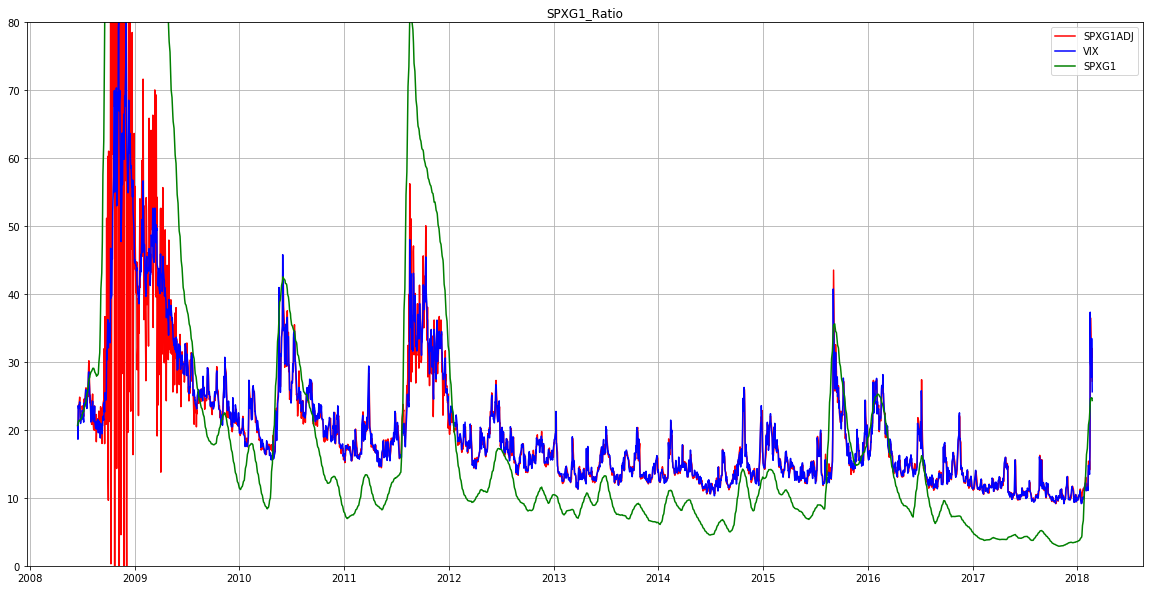

1
                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     5279.
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:22   Log-Likelihood:                -8007.2
No. Observations:                2529   AIC:                         1.602e+04
Df Residuals:                    2527   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2274      0.208     34.768      0

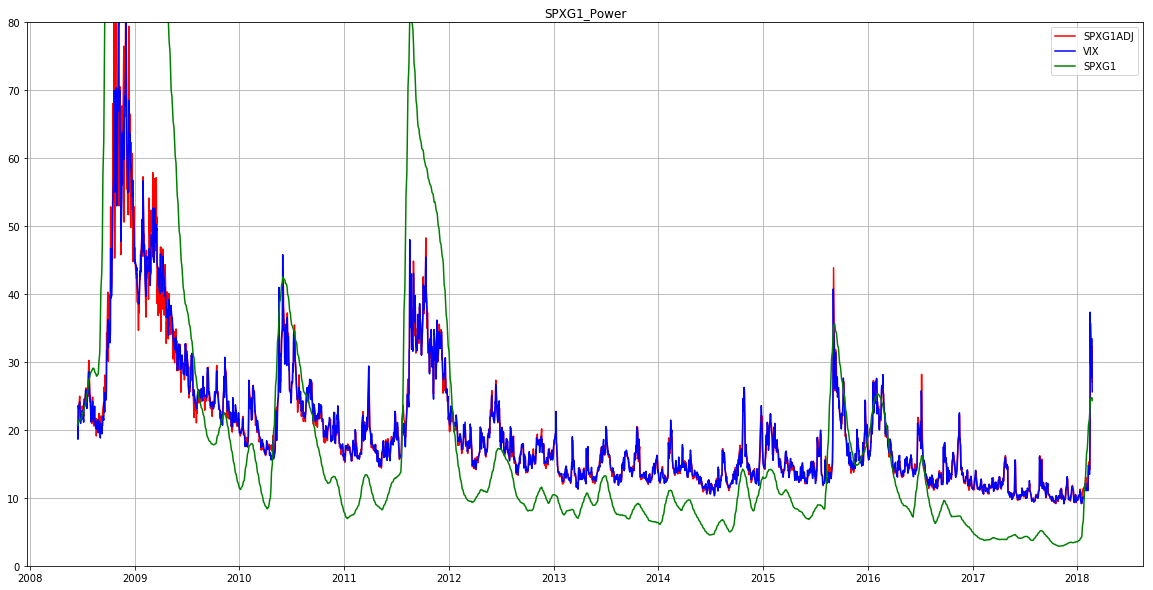

2
                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.098e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:22   Log-Likelihood:                -4635.1
No. Observations:                2529   AIC:                             9274.
Df Residuals:                    2527   BIC:                             9286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6031      0.065      9.220      0

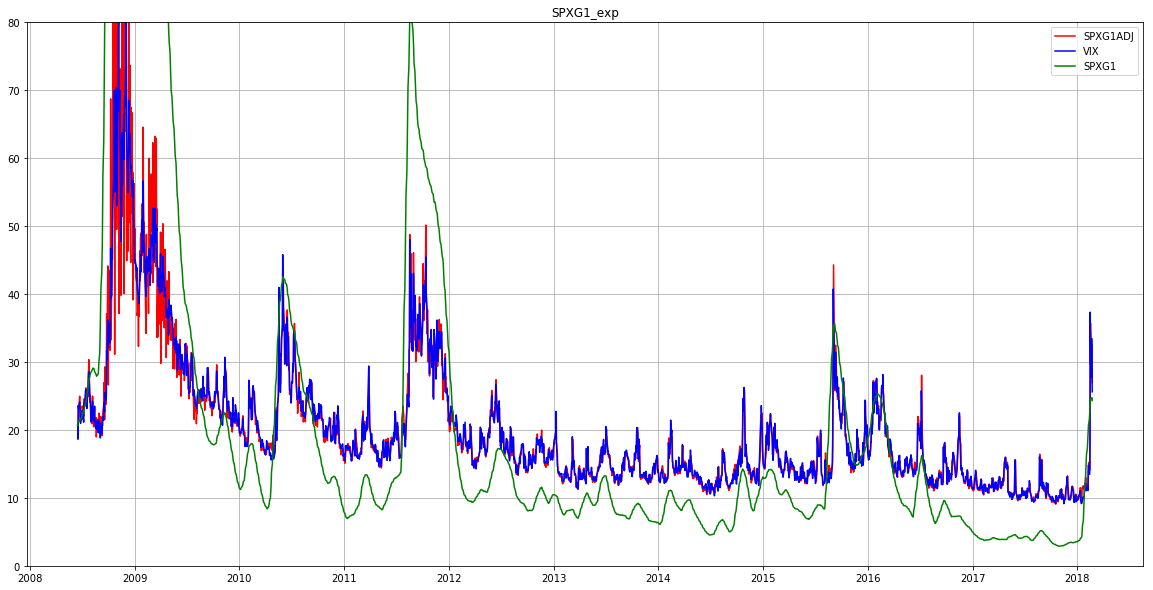

3
                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.323e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:22   Log-Likelihood:                -6083.0
No. Observations:                2529   AIC:                         1.217e+04
Df Residuals:                    2527   BIC:                         1.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1703      0.111     19.607      0

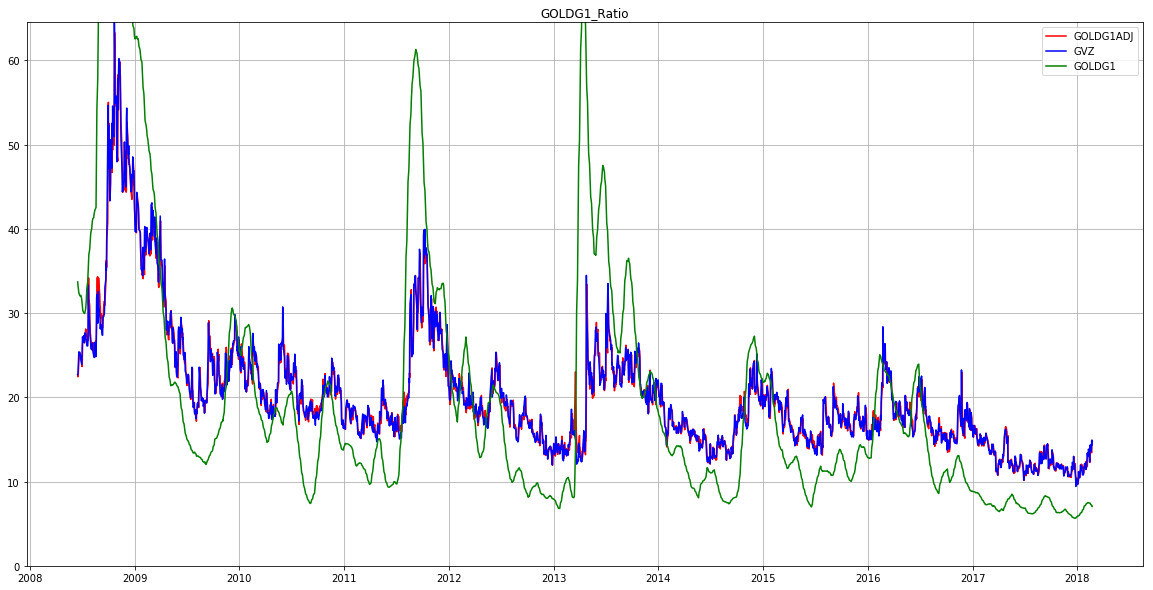

4
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 8.697e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:23   Log-Likelihood:                -4253.3
No. Observations:                2529   AIC:                             8511.
Df Residuals:                    2527   BIC:                             8522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0607      0.073      0.827      0

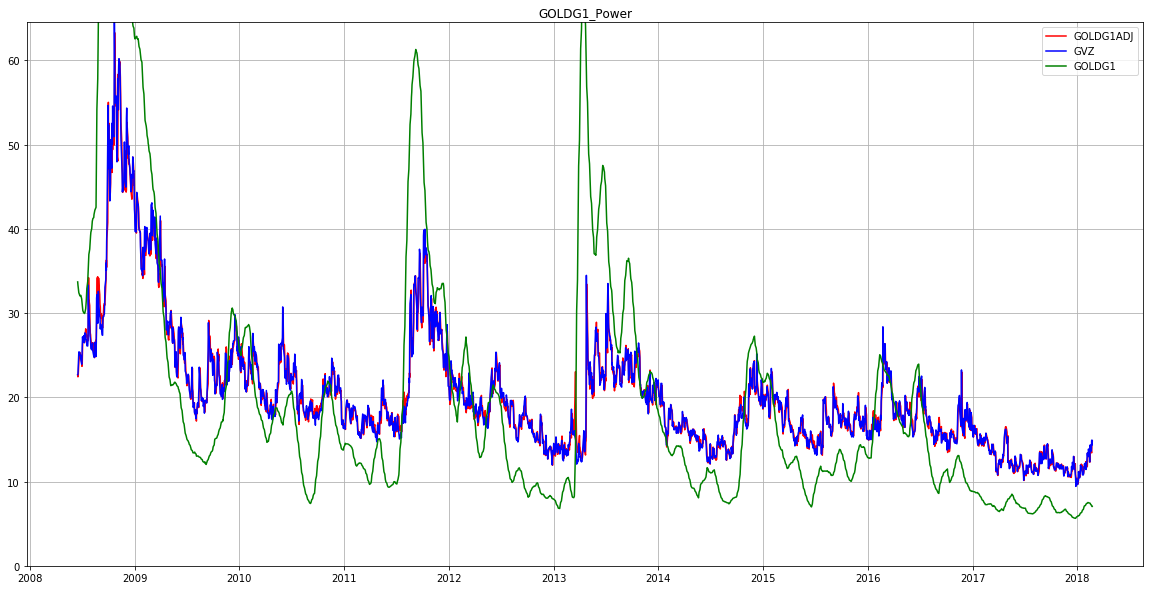

5
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 8.701e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:23   Log-Likelihood:                -4252.7
No. Observations:                2529   AIC:                             8509.
Df Residuals:                    2527   BIC:                             8521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0601      0.073      0.819      0

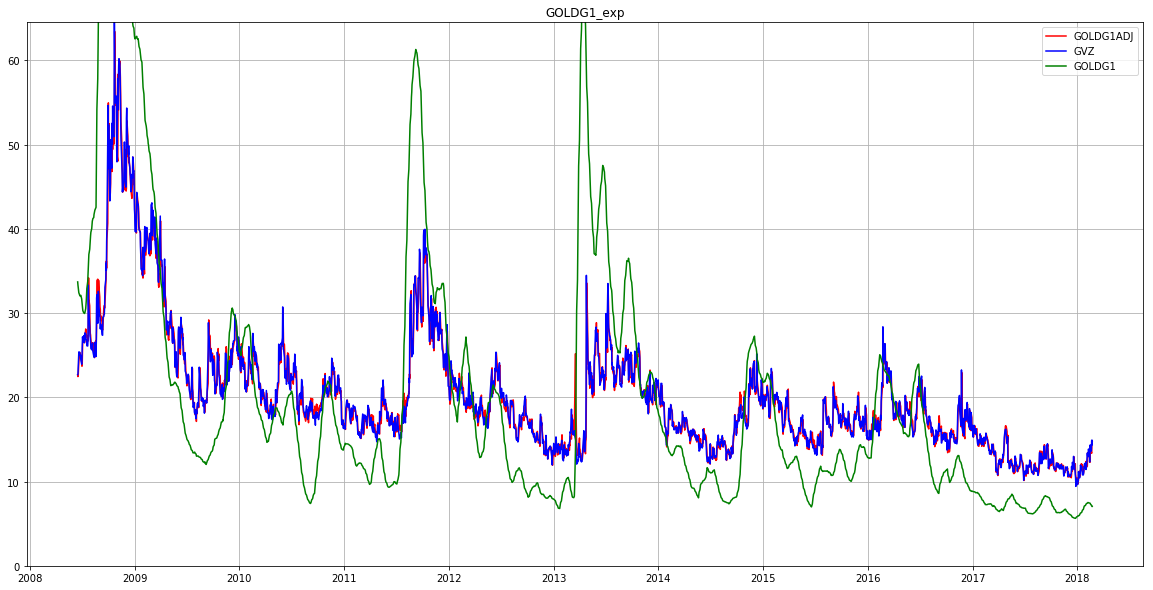

6
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 8.624e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:24   Log-Likelihood:                -4263.6
No. Observations:                2529   AIC:                             8531.
Df Residuals:                    2527   BIC:                             8543.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0867      0.074      1.178      0

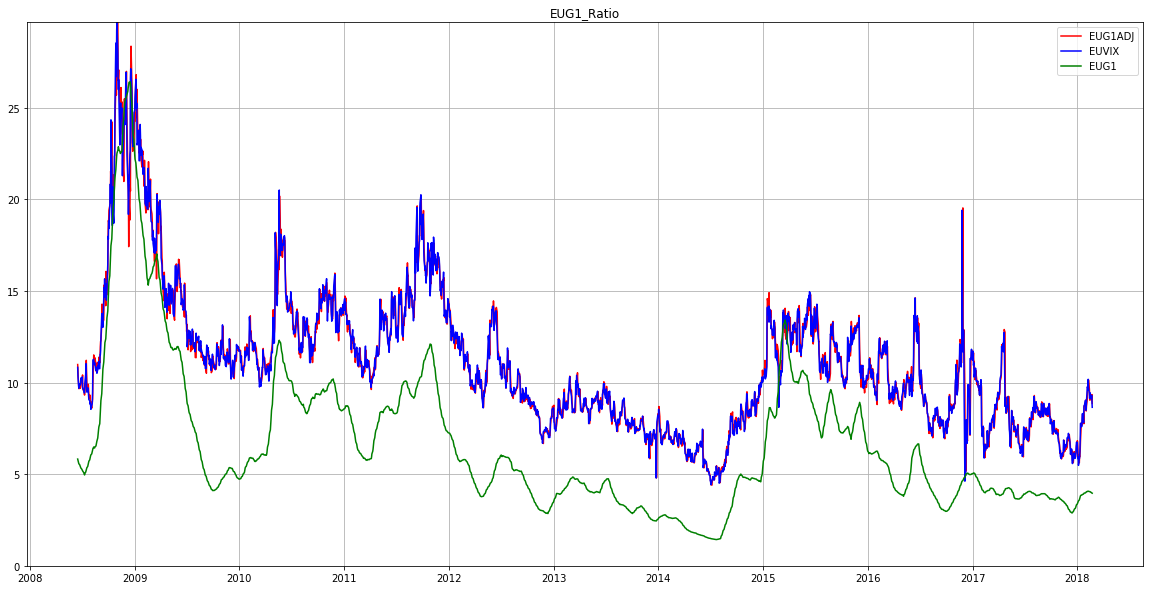

7
                            OLS Regression Results                            
Dep. Variable:                  EUVIX   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 9.973e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:24   Log-Likelihood:                -2330.6
No. Observations:                2529   AIC:                             4665.
Df Residuals:                    2527   BIC:                             4677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1495      0.037      4.078      0

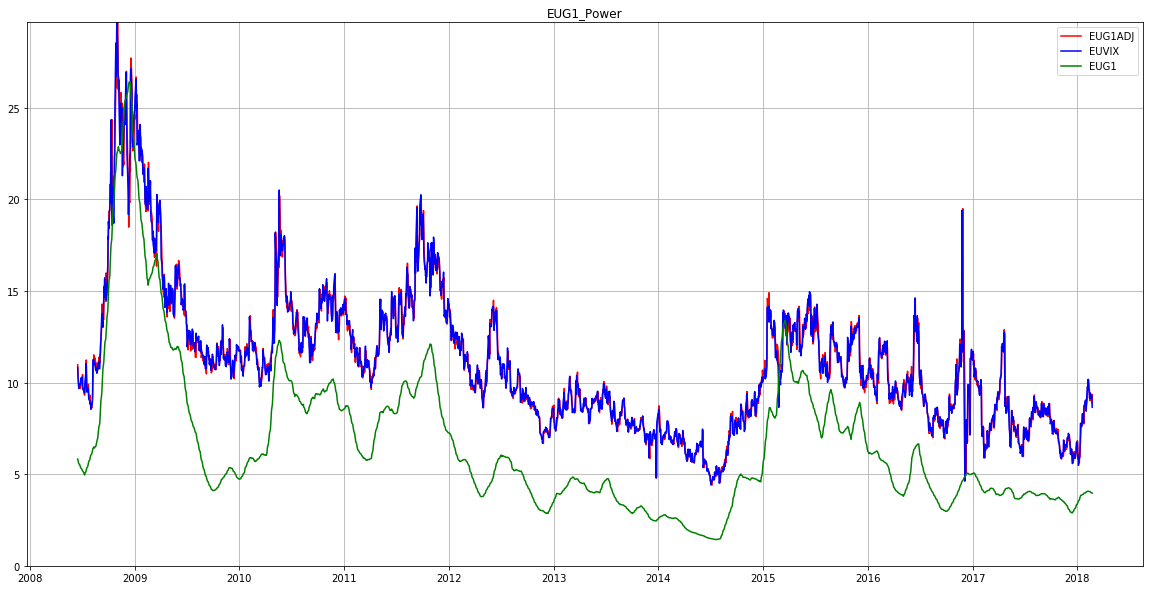

8
                            OLS Regression Results                            
Dep. Variable:                  EUVIX   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.048e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:25   Log-Likelihood:                -2269.2
No. Observations:                2529   AIC:                             4542.
Df Residuals:                    2527   BIC:                             4554.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1374      0.036      3.837      0

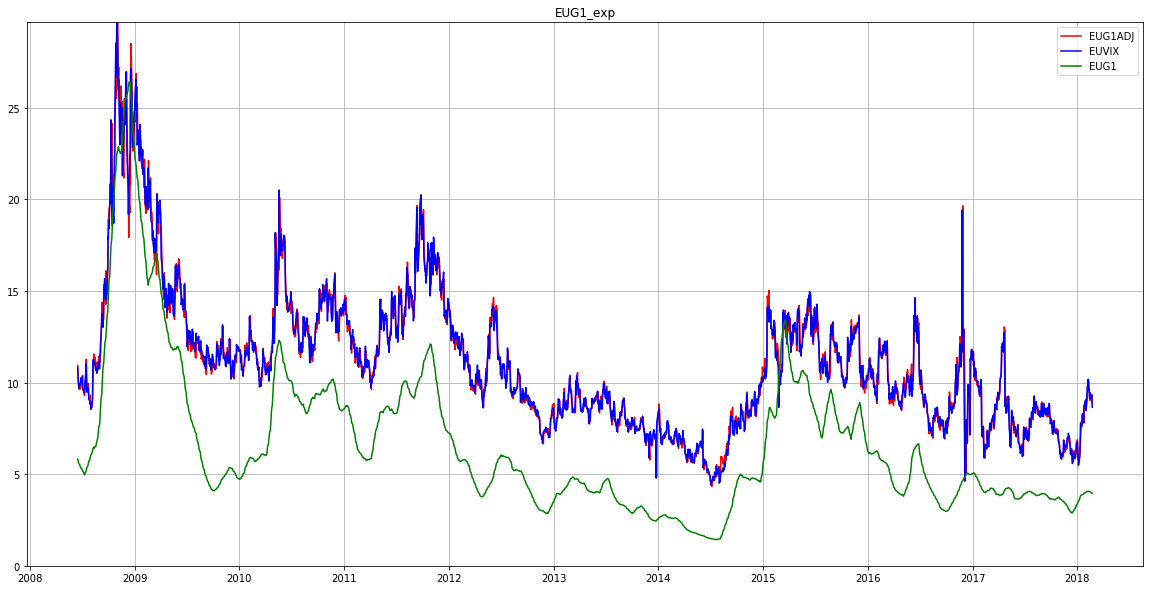

9
                            OLS Regression Results                            
Dep. Variable:                  EUVIX   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 9.862e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:16:25   Log-Likelihood:                -2344.4
No. Observations:                2529   AIC:                             4693.
Df Residuals:                    2527   BIC:                             4705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1642      0.037      4.458      0

In [46]:
count = 0

for i in range(0,len(asset)):
    
    # unbox
    
    name_asset = asset[i]
    name_vix = vol_asset[i]
    name_process = asset[i]+"G1"
    
    x = Data.loc[:,name_process]
    x = df(x.iloc[-days:])
    y = Data.loc[:,vol_asset[i]]
    y = df(y.iloc[-days:])
    #y=mx
    est = sm.OLS(y, x)
    est2 = est.fit()
    print('\n',est2.summary())
    print("MODEL MSE",est2.mse_resid)
    print("MODEL TSE",est2.mse_total)
    
    #save r**2 initial
    rsq_init = est2.rsquared
    all_rsq.iloc[0,i+1] = rsq_init
    
    for j in range(0,len(riskAversion_Function_name)):
        
        name_function = riskAversion_Function_name[j]
        
        dum_Data = Data.loc[:,(name_vix,name_asset+'r','Dates',name_process)].copy(deep=True)
        dum_Data['realize_A('+name_function+')'] = 0.
        dum_Data['Diff'] = 0.
        dum_Data['New_Diff'] = 0.
        dum_Data[name_process+'ADJ'] = 0.
        dum_Data = dum_Data.reset_index(drop=True)
        
        # 0) calculation
        if j == 0 :
            # power
            dum_Data['realize_A('+name_function+')'] = dum_Data.iloc[:,0]/dum_Data.iloc[:,3]
        elif j ==1 :
            # ln_power
            dum_Data['realize_A('+name_function+')'] = np.log(dum_Data.iloc[:,0]/dum_Data.iloc[:,3])
        elif j==2 :
            # expMSM
            dum_Data['realize_A('+name_function+')'] = np.log(dum_Data.iloc[:,0])/np.log(dum_Data.iloc[:,3])
            
        AA = dum_Data['realize_A('+name_function+')']


        # shift downward
        dum_Data['Diff'] = AA - AA.shift(1)
# CHANGE use log
#         dum_Data['Diff'] = np.log(AA) - np.log(AA.shift(1))
        
        y = dum_Data.loc[1:,"Diff"]#.values.reshape(len(dum_Data),1)
        x = dum_Data.iloc[1:,1]
        
# CAHNGE add const
        # 1) reg y=mx to fit the a for multipliler
        x2 = sm.add_constant(x)
        est = sm.OLS(y, x)
        est2 = est.fit()
        print('=========='+name_asset+"===========")
        print('\n',est2.summary())
        print("MODEL MSE",est2.mse_resid)
        print("MODEL TSE",est2.mse_total)
        
# CHANGE THIS ADD CONST
        const = 0 # est2.params.values[0]
        slope = est2.params.values[len(est2.params.values)-1]
        print(slope)
        print(const)
        # 2) Adjust for DIFF
        dum_Data.loc[:,'New_Diff'] = dum_Data.iloc[:,1]*slope + const
        dum_Data.loc[0,'New_Diff'] = slope
        
        # correct for new approximate DIFF
        # as a realize@[t-1] + approximate_Diff

# CHANGE exp adj
#         new_a = dum_Data.iloc[:,4].shift(1) * np.exp(dum_Data.loc[:,'New_Diff'])
        new_a = dum_Data.iloc[:,4].shift(1) + dum_Data.loc[:,'New_Diff']

# # CHANGE use predicted data if want to use old data close this for loop
#         for ee in range(2,len(AA)):
#         # CHANGE exp adj
# #             new_a.loc[ee] = new_a.iloc[ee-1] * np.exp(dum_Data.loc[ee,'New_Diff'])
#             new_a.loc[ee] = new_a.iloc[ee-1] + dum_Data.loc[ee,'New_Diff']
# # ===============================================================================
        
        # 3) MSM_adjust

        if j == 0 :
            # power
            dum_Data[name_process+'ADJ'] = dum_Data.iloc[:,3] * new_a
        elif j ==1 :
            # ln_power
            dum_Data[name_process+'ADJ'] = dum_Data.iloc[:,3] * np.exp(new_a)
        elif j==2 :
            # expMSM
            dum_Data[name_process+'ADJ'] = np.power(dum_Data.iloc[:,3],new_a)
            
        # 4) reg and print 
            
        y = dum_Data.iloc[1:,0]#.values.reshape(len(dum_Data),1)
        x = dum_Data.loc[1:,name_process+'ADJ']
# all wrong =====================================================
#         # 1) reg y=mx to fit the a for multipliler
#         est = sm.OLS(y, x)
#         est2 = est.fit()
        
#         count = count +1
#         print(count)
#         print('=========='+name_function+"===========")
#         print(est2.summary())
#         print("MODEL MSE : ",est2.mse_resid)
#         print("MODEL TSE : ",est2.mse_total)
#         print("Marginal R-Sq %2.5f : " %(-rsq_init + est2.rsquared) )
# ============================================================
# use this
        sse = sum((y-x)**2)
        sst = sum((y -y.mean())**2)
        mse = sse/(len(y)-1)
        rsq = 1-sse/sst
        
        print("MODEL MSE : ",mse)
        print("MODEL TSE : ",sst/(len(y)))
        print("Marginal R-Sq %2.5f : " %(-rsq_init + rsq) )
        
        # ======================================================
        all_rsq.iloc[j+1,i+1] = rsq - rsq_init
        lambda_value.iloc[j+1,i+1] = slope
        # =====================================================
        
        plt.figure(figsize=(20,10))
        plt.plot(dum_Data.loc[1:,"Dates"],x,'r',dum_Data.loc[1:,"Dates"],y,'b',
                 dum_Data.loc[1:,"Dates"],dum_Data.loc[1:,name_process],'g')
        plt.title(name_process +'_'+name_function)
        plt.legend([name_process+'ADJ', name_vix,name_process])
        plt.ylim(ymin = 0)
        plt.ylim(ymax = min(80,max(dum_Data.loc[:,name_vix])))
        plt.grid(b=True)
        plt.show()
        
        
        count = count +1
        print(count)
        x2 = sm.add_constant(x)
        est = sm.OLS(y, x2)
        est2 = est.fit()
        print(est2.summary())
        print("MODEL MSE : ",est2.mse_resid)
        print("MODEL TSE : ",est2.mse_total)
        print("Marginal R-Sq : %2.5f " %(-rsq_init + est2.rsquared) )
        
       
        
        
#         # save each adj result
#         name_L = name_process.join((date.today().strftime('%y%m%d'),'_'+name_asset+"_by_"+name_function+'.xlsx'))
#         writer = pd.ExcelWriter(name_L)
#         print(name_L)
#         dum_Data.to_excel(writer, 'Sheet1')
#         writer.save()
        
name_L = ('All_Marginal_RsqAlternative_'+name_process[-1]).join((date.today().strftime('%y%m%d'),'.xlsx'))
writer = pd.ExcelWriter(name_L)
all_rsq.to_excel(writer, 'rsq')
lambda_value.to_excel(writer, 'lambda')
print(name_L)
writer.save()


### G2


                             OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     3850.
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:06   Log-Likelihood:                -10270.
No. Observations:                2530   AIC:                         2.054e+04
Df Residuals:                    2529   BIC:                         2.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPXG2          0.3350      0.005     62.052      0

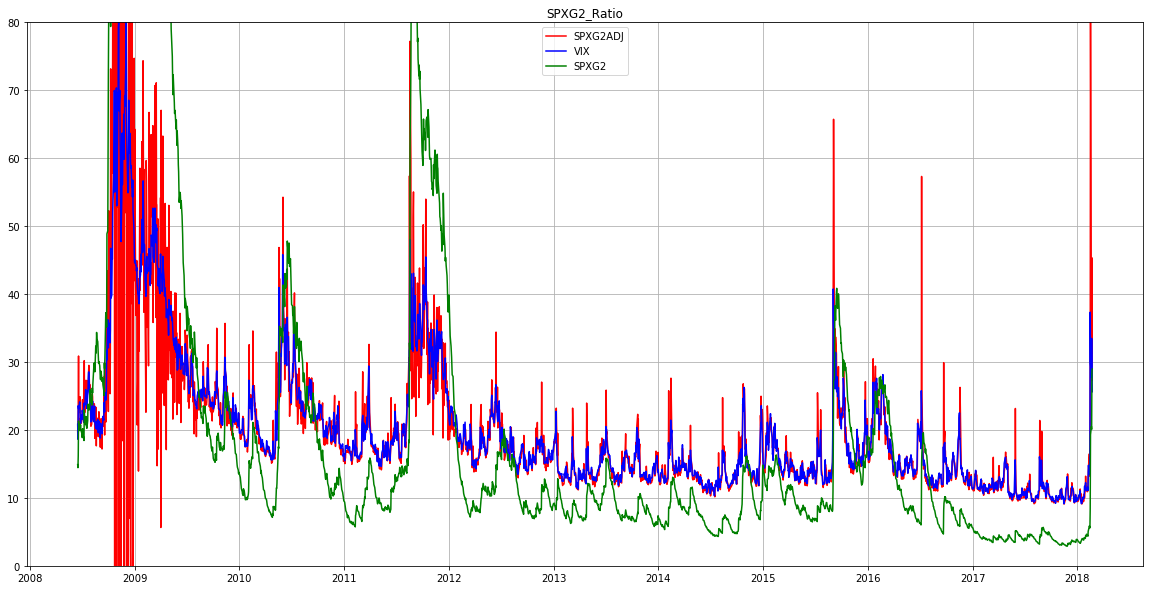

1
                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     3500.
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:06   Log-Likelihood:                -8334.3
No. Observations:                2529   AIC:                         1.667e+04
Df Residuals:                    2527   BIC:                         1.668e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1907      0.222     41.377      0

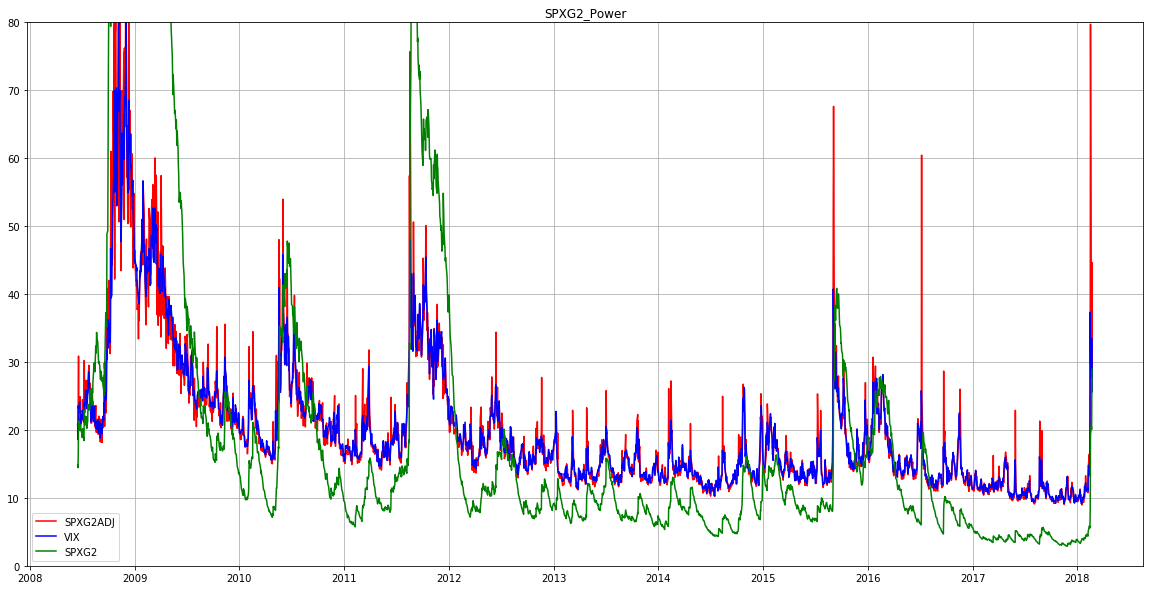

2
                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 3.769e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:07   Log-Likelihood:                -5934.2
No. Observations:                2529   AIC:                         1.187e+04
Df Residuals:                    2527   BIC:                         1.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8593      0.105     17.635      0

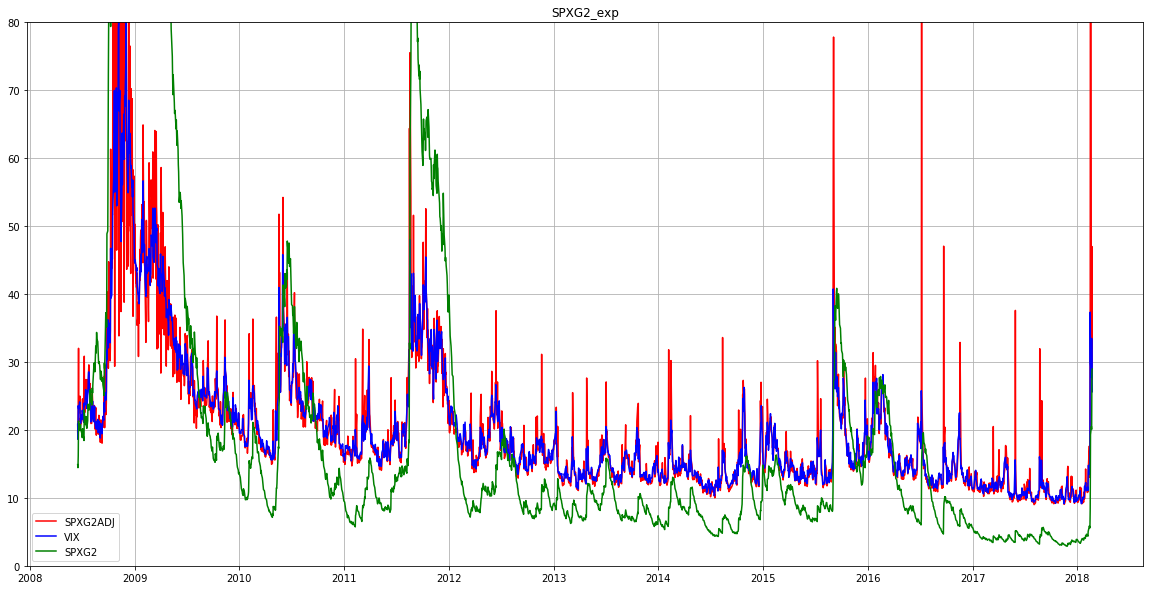

3
                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 1.362e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:07   Log-Likelihood:                -7088.4
No. Observations:                2529   AIC:                         1.418e+04
Df Residuals:                    2527   BIC:                         1.419e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2072      0.156     27.006      0

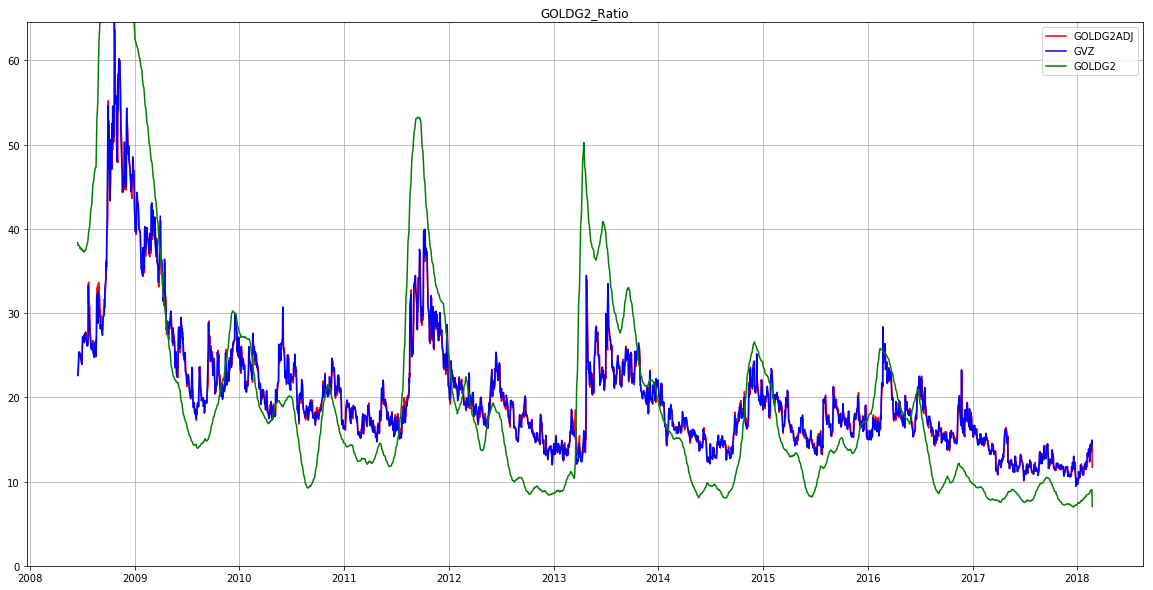

4
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 9.349e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:08   Log-Likelihood:                -4164.3
No. Observations:                2529   AIC:                             8333.
Df Residuals:                    2527   BIC:                             8344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0920      0.071      1.301      0

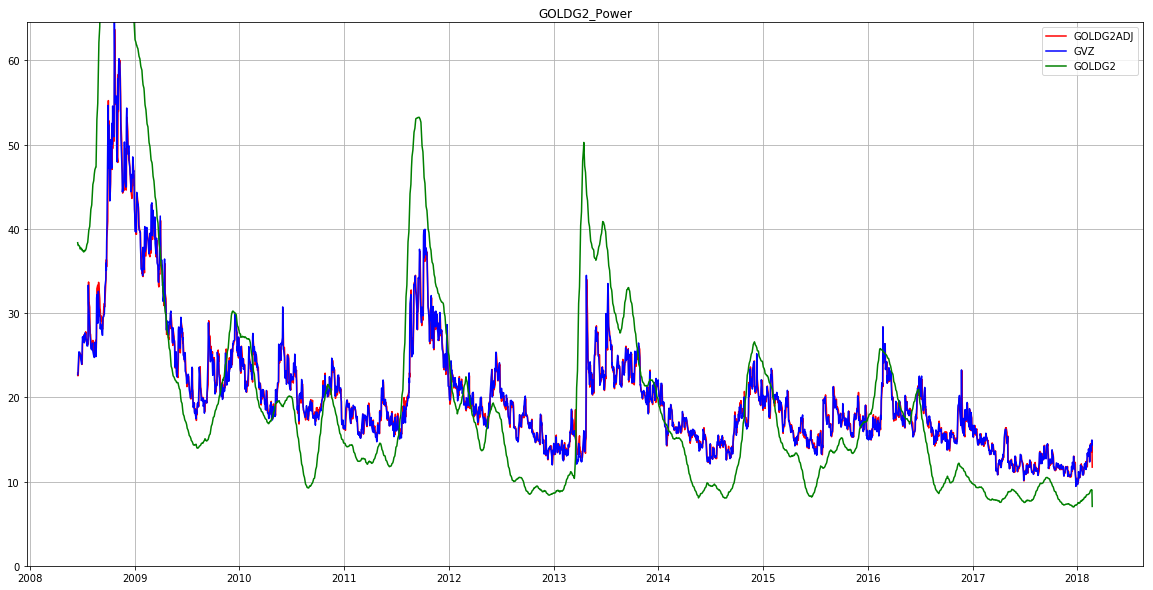

5
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 9.369e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:08   Log-Likelihood:                -4161.7
No. Observations:                2529   AIC:                             8327.
Df Residuals:                    2527   BIC:                             8339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0915      0.071      1.295      0

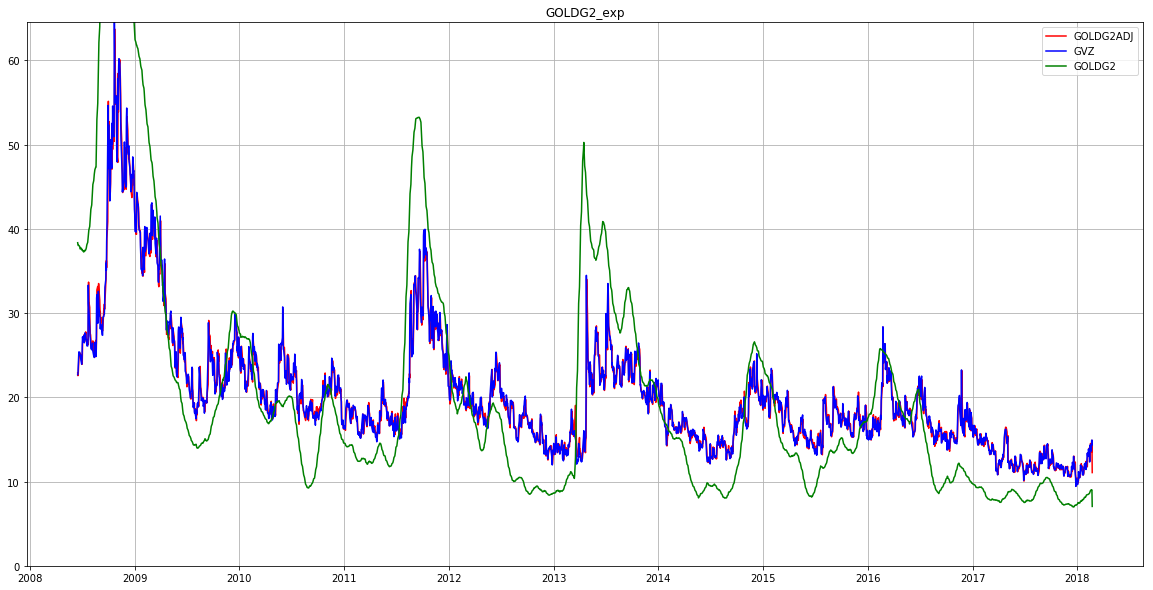

6
                            OLS Regression Results                            
Dep. Variable:                    GVZ   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 9.345e+04
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:09   Log-Likelihood:                -4164.9
No. Observations:                2529   AIC:                             8334.
Df Residuals:                    2527   BIC:                             8345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1079      0.071      1.526      0

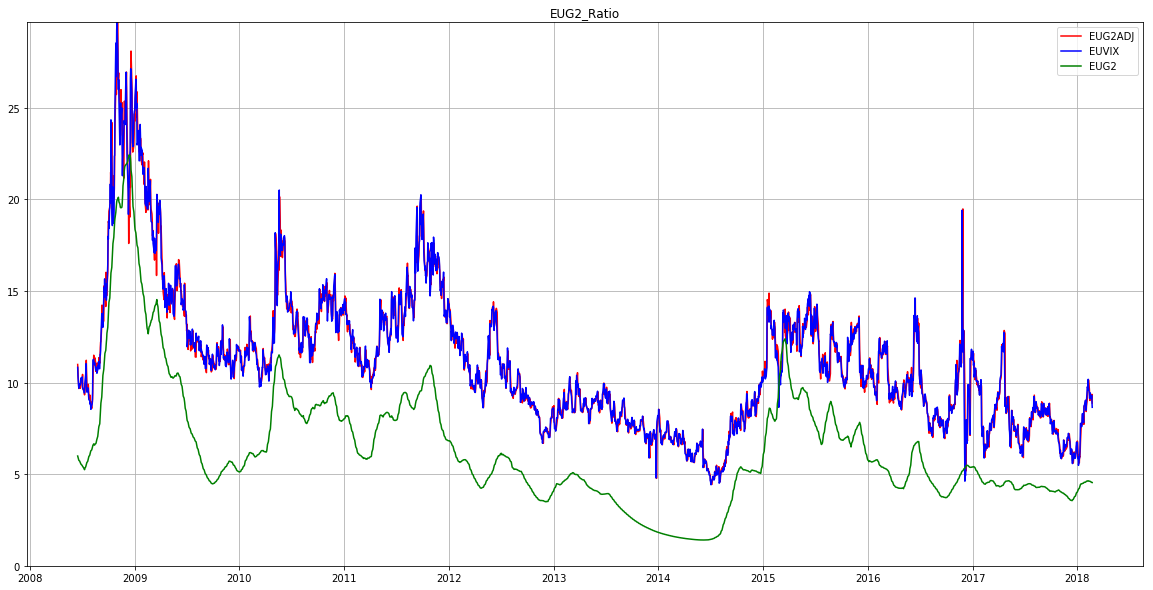

7
                            OLS Regression Results                            
Dep. Variable:                  EUVIX   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.017e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:09   Log-Likelihood:                -2306.6
No. Observations:                2529   AIC:                             4617.
Df Residuals:                    2527   BIC:                             4629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1281      0.036      3.521      0

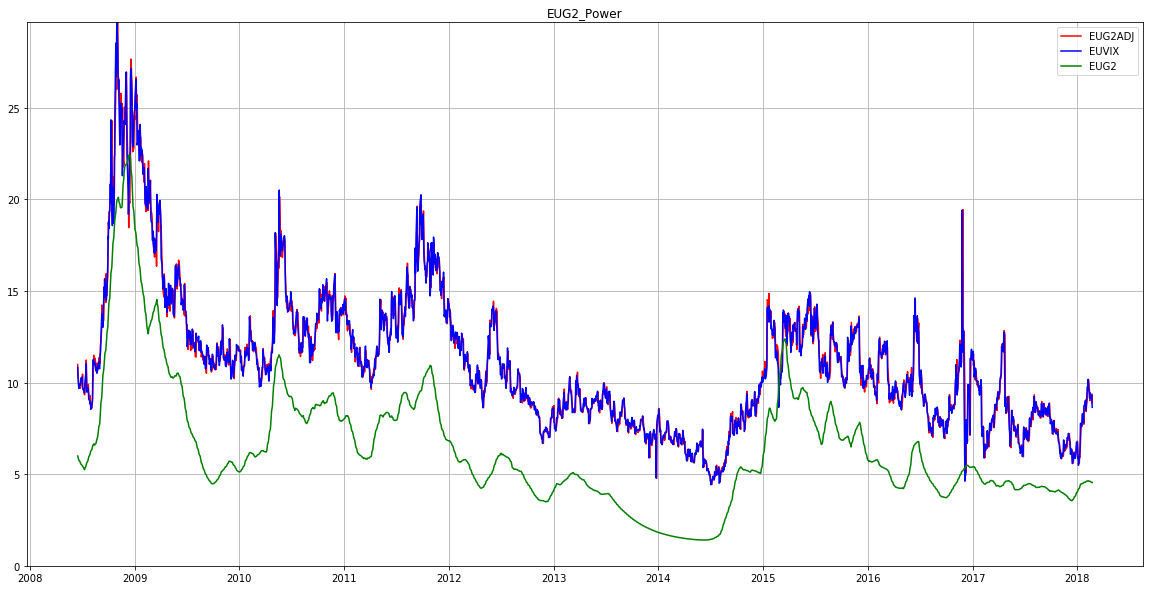

8
                            OLS Regression Results                            
Dep. Variable:                  EUVIX   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.053e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:10   Log-Likelihood:                -2263.4
No. Observations:                2529   AIC:                             4531.
Df Residuals:                    2527   BIC:                             4542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1210      0.036      3.383      0

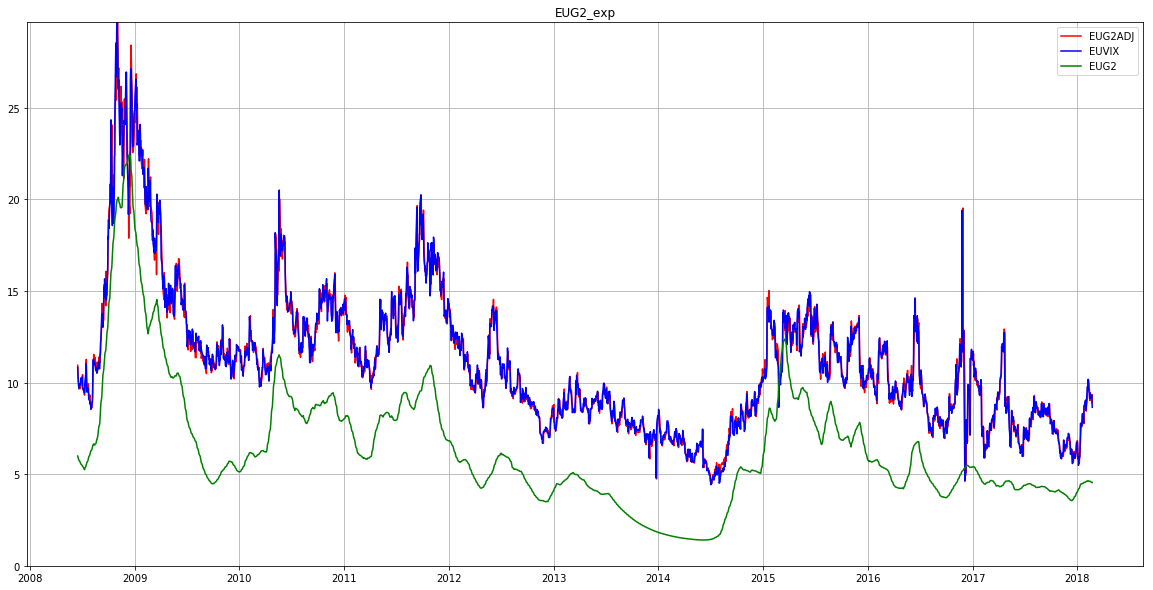

9
                            OLS Regression Results                            
Dep. Variable:                  EUVIX   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.001e+05
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:10   Log-Likelihood:                -2326.2
No. Observations:                2529   AIC:                             4656.
Df Residuals:                    2527   BIC:                             4668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1445      0.037      3.945      0

In [47]:
count = 0

for i in range(0,len(asset)):
    
    # unbox
    
    name_asset = asset[i]
    name_vix = vol_asset[i]
    name_process = asset[i]+"G2"
    
    x = Data.loc[:,name_process]
    x = df(x.iloc[-days:])
    y = Data.loc[:,vol_asset[i]]
    y = df(y.iloc[-days:])
    #y=mx
    est = sm.OLS(y, x)
    est2 = est.fit()
    print('\n',est2.summary())
    print("MODEL MSE",est2.mse_resid)
    print("MODEL TSE",est2.mse_total)
    
    #save r**2 initial
    rsq_init = est2.rsquared
    all_rsq.iloc[0,i+1] = rsq_init
    
    for j in range(0,len(riskAversion_Function_name)):
        
        name_function = riskAversion_Function_name[j]
        
        dum_Data = Data.loc[:,(name_vix,name_asset+'r','Dates',name_process)].copy(deep=True)
        dum_Data['realize_A('+name_function+')'] = 0.
        dum_Data['Diff'] = 0.
        dum_Data['New_Diff'] = 0.
        dum_Data[name_process+'ADJ'] = 0.
        dum_Data = dum_Data.reset_index(drop=True)
        
        # 0) calculation
        if j == 0 :
            # power
            dum_Data['realize_A('+name_function+')'] = dum_Data.iloc[:,0]/dum_Data.iloc[:,3]
        elif j ==1 :
            # ln_power
            dum_Data['realize_A('+name_function+')'] = np.log(dum_Data.iloc[:,0]/dum_Data.iloc[:,3])
        elif j==2 :
            # expMSM
            dum_Data['realize_A('+name_function+')'] = np.log(dum_Data.iloc[:,0])/np.log(dum_Data.iloc[:,3])
            
        AA = dum_Data['realize_A('+name_function+')']


        # shift downward
        dum_Data['Diff'] = AA - AA.shift(1)
# CHANGE use log
#         dum_Data['Diff'] = np.log(AA) - np.log(AA.shift(1))
        
        y = dum_Data.loc[1:,"Diff"]#.values.reshape(len(dum_Data),1)
        x = dum_Data.iloc[1:,1]
        
# CAHNGE add const
        # 1) reg y=mx to fit the a for multipliler
        x2 = sm.add_constant(x)
        est = sm.OLS(y, x)
        est2 = est.fit()
        print('=========='+name_asset+"===========")
        print('\n',est2.summary())
        print("MODEL MSE",est2.mse_resid)
        print("MODEL TSE",est2.mse_total)
        
# CHANGE THIS ADD CONST
        const = 0 # est2.params.values[0]
        slope = est2.params.values[len(est2.params.values)-1]
        print(slope)
        print(const)
        # 2) Adjust for DIFF
        dum_Data.loc[:,'New_Diff'] = dum_Data.iloc[:,1]*slope + const
        dum_Data.loc[0,'New_Diff'] = slope
        
        # correct for new approximate DIFF
        # as a realize@[t-1] + approximate_Diff

# CHANGE exp adj
#         new_a = dum_Data.iloc[:,4].shift(1) * np.exp(dum_Data.loc[:,'New_Diff'])
        new_a = dum_Data.iloc[:,4].shift(1) + dum_Data.loc[:,'New_Diff']

# # CHANGE use predicted data if want to use old data close this for loop
#         for ee in range(2,len(AA)):
#         # CHANGE exp adj
# #             new_a.loc[ee] = new_a.iloc[ee-1] * np.exp(dum_Data.loc[ee,'New_Diff'])
#             new_a.loc[ee] = new_a.iloc[ee-1] + dum_Data.loc[ee,'New_Diff']
# # ===============================================================================
        
        # 3) MSM_adjust

        if j == 0 :
            # power
            dum_Data[name_process+'ADJ'] = dum_Data.iloc[:,3] * new_a
        elif j ==1 :
            # ln_power
            dum_Data[name_process+'ADJ'] = dum_Data.iloc[:,3] * np.exp(new_a)
        elif j==2 :
            # expMSM
            dum_Data[name_process+'ADJ'] = np.power(dum_Data.iloc[:,3],new_a)
            
        # 4) reg and print 
            
        y = dum_Data.iloc[1:,0]#.values.reshape(len(dum_Data),1)
        x = dum_Data.loc[1:,name_process+'ADJ']
# all wrong =====================================================
#         # 1) reg y=mx to fit the a for multipliler
#         est = sm.OLS(y, x)
#         est2 = est.fit()
        
#         count = count +1
#         print(count)
#         print('=========='+name_function+"===========")
#         print(est2.summary())
#         print("MODEL MSE : ",est2.mse_resid)
#         print("MODEL TSE : ",est2.mse_total)
#         print("Marginal R-Sq %2.5f : " %(-rsq_init + est2.rsquared) )
# ============================================================
# use this
        sse = sum((y-x)**2)
        sst = sum((y -y.mean())**2)
        mse = sse/(len(y)-1)
        rsq = 1-sse/sst
        
        print("MODEL MSE : ",mse)
        print("MODEL TSE : ",sst/(len(y)))
        print("Marginal R-Sq %2.5f : " %(-rsq_init + rsq) )
        
        # ======================================================
        all_rsq.iloc[j+1,i+1] = rsq - rsq_init
        lambda_value.iloc[j+1,i+1] = slope
        # =====================================================
        
        plt.figure(figsize=(20,10))
        plt.plot(dum_Data.loc[1:,"Dates"],x,'r',dum_Data.loc[1:,"Dates"],y,'b',
                 dum_Data.loc[1:,"Dates"],dum_Data.loc[1:,name_process],'g')
        plt.title(name_process +'_'+name_function)
        plt.legend([name_process+'ADJ', name_vix,name_process])
        plt.ylim(ymin = 0)
        plt.ylim(ymax = min(80,max(dum_Data.loc[:,name_vix])))
        plt.grid(b=True)
        plt.show()
        
        
        count = count +1
        print(count)
        x2 = sm.add_constant(x)
        est = sm.OLS(y, x2)
        est2 = est.fit()
        print(est2.summary())
        print("MODEL MSE : ",est2.mse_resid)
        print("MODEL TSE : ",est2.mse_total)
        print("Marginal R-Sq : %2.5f " %(-rsq_init + est2.rsquared) )
        
       
        
        
#         # save each adj result
#         name_L = name_process.join((date.today().strftime('%y%m%d'),'_'+name_asset+"_by_"+name_function+'.xlsx'))
#         writer = pd.ExcelWriter(name_L)
#         print(name_L)
#         dum_Data.to_excel(writer, 'Sheet1')
#         writer.save()
        
name_L = ('All_Marginal_RsqAlternative_'+name_process[-1]).join((date.today().strftime('%y%m%d'),'.xlsx'))
writer = pd.ExcelWriter(name_L)
all_rsq.to_excel(writer, 'rsq')
lambda_value.to_excel(writer, 'lambda')
print(name_L)
writer.save()
